In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("crimes_against_women_2001-2014.csv")
print("***** First Five Rows of Data *****")
print()
df.head()

***** First Five Rows of Data *****



,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [3]:
print("***** Number of states or union territories with duplicates we have in Data *****")
print()
states=df['STATE/UT'].unique()
print("Number of states/territories with duplicates: ", len(states))
print()
print(states)

***** Number of states or union territories with duplicates we have in Data *****

Number of states/territories with duplicates:  72

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Laksha

In [4]:
#REMOVING DUPLICATES
df["STATE/UT"]=df.apply(lambda row:row['STATE/UT'].replace(" ","").lower(),axis=1)
df['STATE/UT'].replace("delhiut",'delhi',inplace=True)

In [5]:
print("***** Number of states or union territories without duplicates we have in Data *****")
print()
states=df['STATE/UT'].unique()
print("Number of states/territories without duplicates: ", len(states))
print()
print(states)

***** Number of states or union territories without duplicates we have in Data *****

Number of states/territories without duplicates:  36

['andhrapradesh' 'arunachalpradesh' 'assam' 'bihar' 'chhattisgarh' 'goa'
 'gujarat' 'haryana' 'himachalpradesh' 'jammu&kashmir' 'jharkhand'
 'karnataka' 'kerala' 'madhyapradesh' 'maharashtra' 'manipur' 'meghalaya'
 'mizoram' 'nagaland' 'odisha' 'punjab' 'rajasthan' 'sikkim' 'tamilnadu'
 'tripura' 'uttarpradesh' 'uttarakhand' 'westbengal' 'a&nislands'
 'chandigarh' 'd&nhaveli' 'daman&diu' 'delhi' 'lakshadweep' 'puducherry'
 'telangana']


In [6]:
df.isnull().sum()


Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [7]:
#Dropping "Unnamed" Column
df=df.drop(['Unnamed: 0'],axis=1)

In [8]:
df['total_crimes']=(df['Rape']+df['Kidnapping and Abduction']+df['Dowry Deaths']+
                       df['Assault on women with intent to outrage her modesty']+
                       df['Insult to modesty of Women']+df['Cruelty by Husband or his Relatives']+
                       df['Importation of Girls'])

In [9]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=10)
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y+2,y,ha='center',fontweight='bold',fontsize=7)


In [10]:
value_count=list(df["STATE/UT"].value_counts())
print("***** Value counts of STATES/UT *****")
print()
print(value_count)

***** Value counts of STATES/UT *****

[1032, 739, 645, 632, 552, 541, 504, 472, 461, 425, 424, 384, 372, 370, 366, 324, 318, 276, 234, 222, 208, 196, 162, 147, 129, 120, 87, 71, 44, 43, 42, 37, 28, 28, 28, 14]


In [11]:
#total_crimes
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']

df1=pd.DataFrame()
for i in crimes:
    df_crimes=df.groupby(['Year'])[i].sum()
    df1[i]=df_crimes

print("***** Total number of crimes from 2001 to 2014 *****")
print()
df1

***** Total number of crimes from 2001 to 2014 *****



,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
Year,,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228,261450
2002,32746,29012,13644,67886,20310,98474,152,262224
2003,31694,26592,12416,65878,24650,101406,92,262728
2004,36466,31156,14052,69134,20002,116242,178,287230
2005,36718,31500,13574,68350,19968,116638,298,287046
2006,38696,34828,15236,73234,19932,126256,134,308316
2007,41474,40832,16186,77468,21900,151860,122,349842
2008,42934,45878,16344,80826,24428,162688,134,373232
2009,42794,51482,16766,77422,22018,179092,96,389670


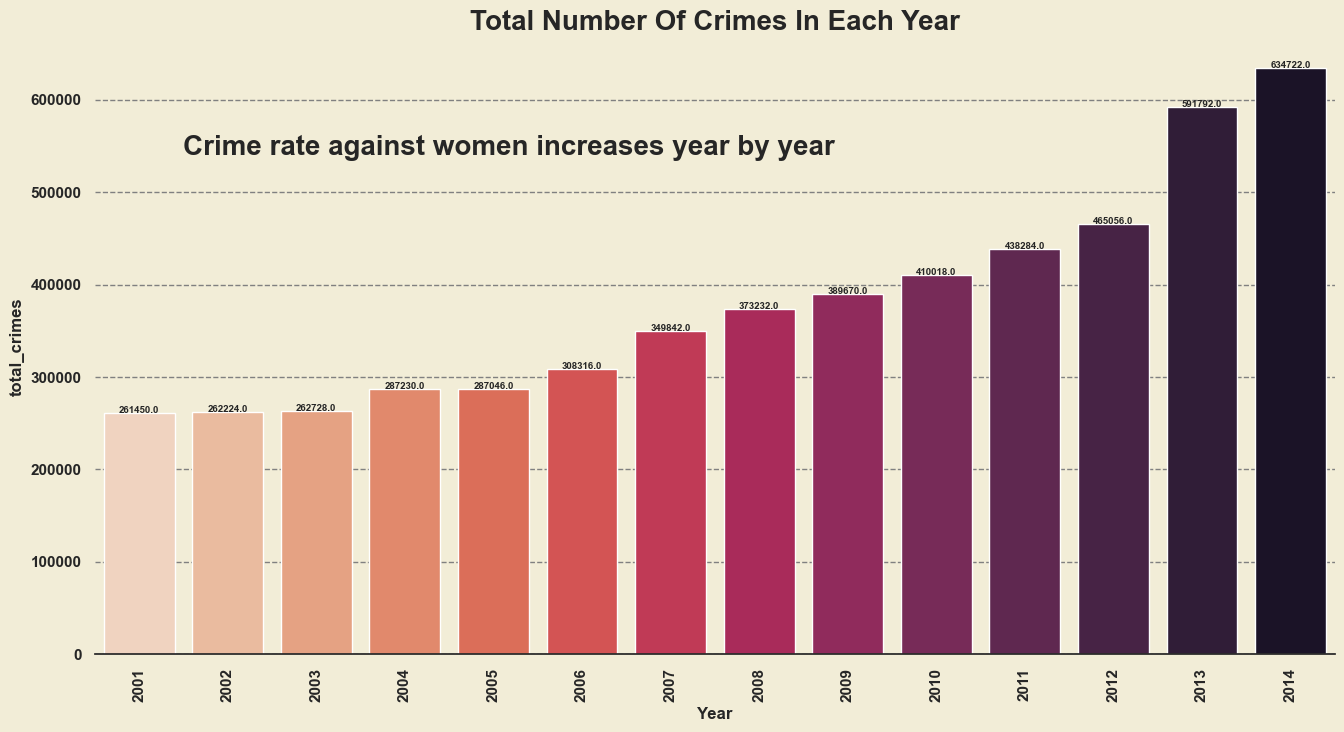

In [12]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

lower_year=2001
upper_year=2014
arr=[]
for i in range(lower_year,upper_year+1):
    arr.append(i)
arr=np.array(arr)
a=sns.barplot(data=df1,x=arr,y='total_crimes',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Each Year",fontweight='bold',fontsize=20)
without_hue(df1,'total_crimes',a)
plt.show()

In [13]:
def plotting_cat_features(nrows,ncols,cat_columns):
    
    f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(16,25))
    f.patch.set_facecolor('#F2EDD7FF')
    #Setting background and foreground color
    for i in range(0,nrows):
        for j in range(0,ncols):
            ax[i][j].set_facecolor('#F2EDD7FF')

    #Plotting count plot 
    for i in range(0,nrows):
        for j in range(0,ncols):
            a1=sns.barplot(data=df1,x=df1.index,y=cat_columns[i*(nrows-2)+j],palette='rocket',ax=ax[i][j])
            without_hue(df,cat_columns[i-1],a1)
            #Dealing with spines
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['left'].set_visible(False)
            ax[i][j].grid(linestyle="--",axis='y',color='gray')
            
        
    


********** How each crime varying year by year **********



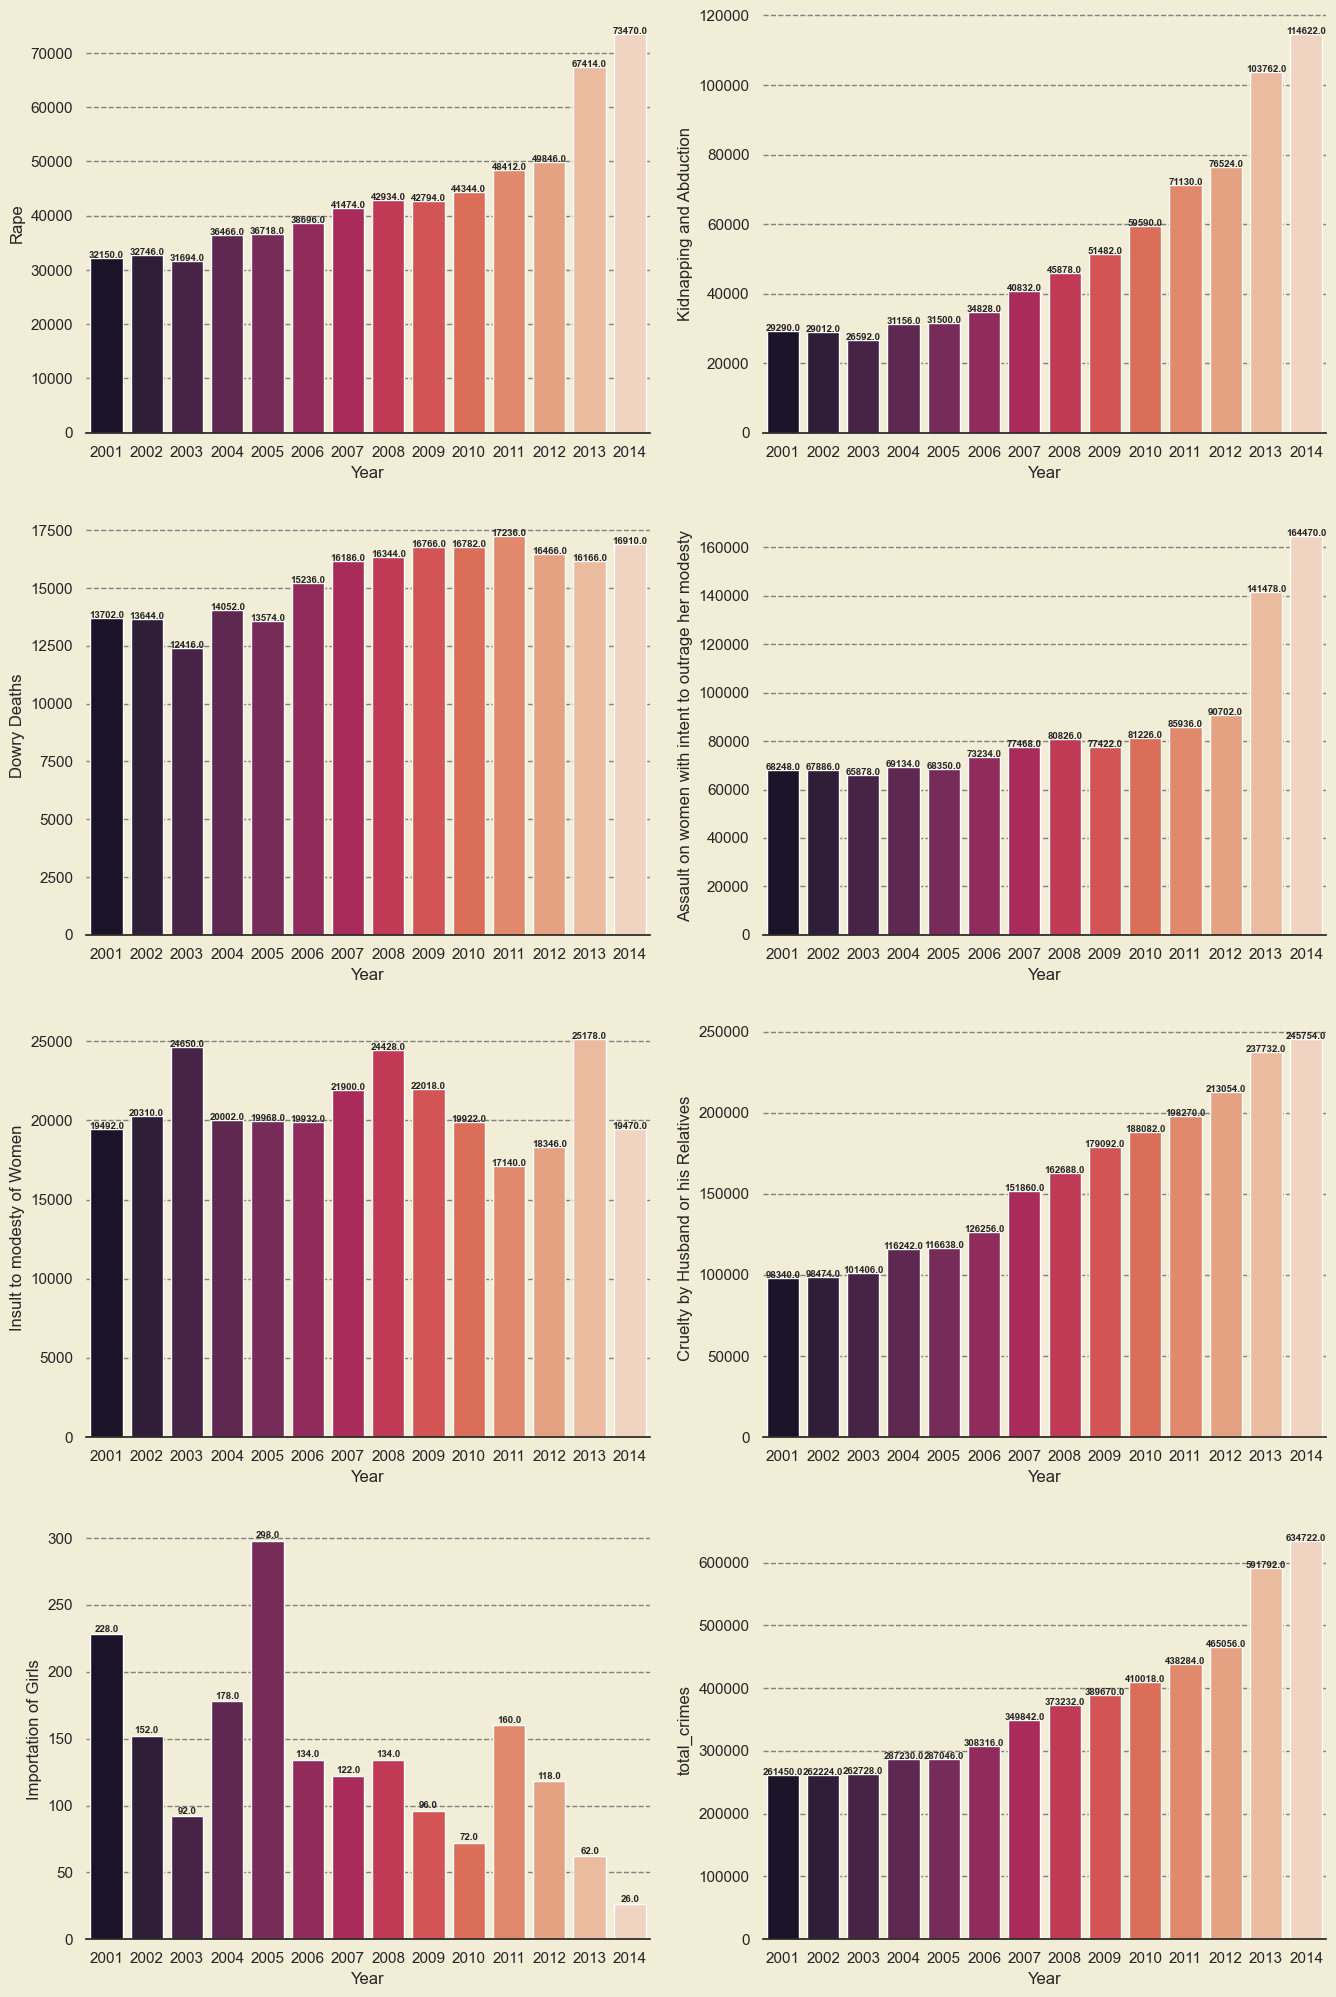

In [14]:
print("********** How each crime varying year by year **********")
print()
plotting_cat_features(4,2,crimes)


C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\2717805039.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


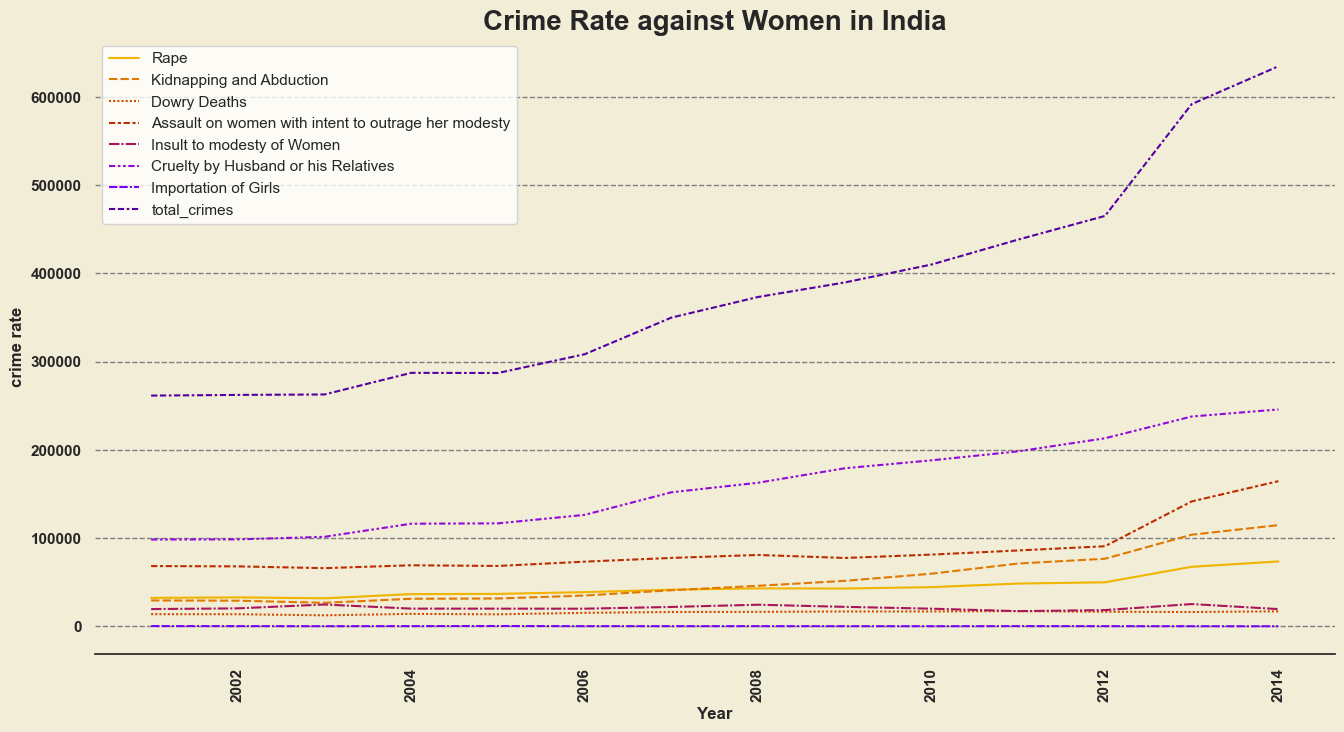

In [15]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

lower_year=2001
upper_year=2014
arr=[]
for i in range(lower_year,upper_year+1):
    arr.append(i)
arr=np.array(arr)

a=sns.lineplot(data=df1,palette='gnuplot_r',linestyle="dashed")#,x=arr,y='Rape',hue_order=crimes,palette='rocket_r')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("crime rate",fontweight='bold')
plt.title("Crime Rate against Women in India",fontweight='bold',fontsize=20)
plt.show()

C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\3307603234.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_crimes=df_top_crimes.append({'crimes':i ,'total':df[i].sum(axis=0)},ignore_index=True)
C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\3307603234.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_crimes=df_top_crimes.append({'crimes':i ,'total':df[i].sum(axis=0)},ignore_index=True)
C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\3307603234.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_crimes=df_top_crimes.append({'crimes':i ,'total':df[i].sum(axis=0)},ignore_index=True)
C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\3307603234.py:8: FutureWarning: The frame.append method is dep

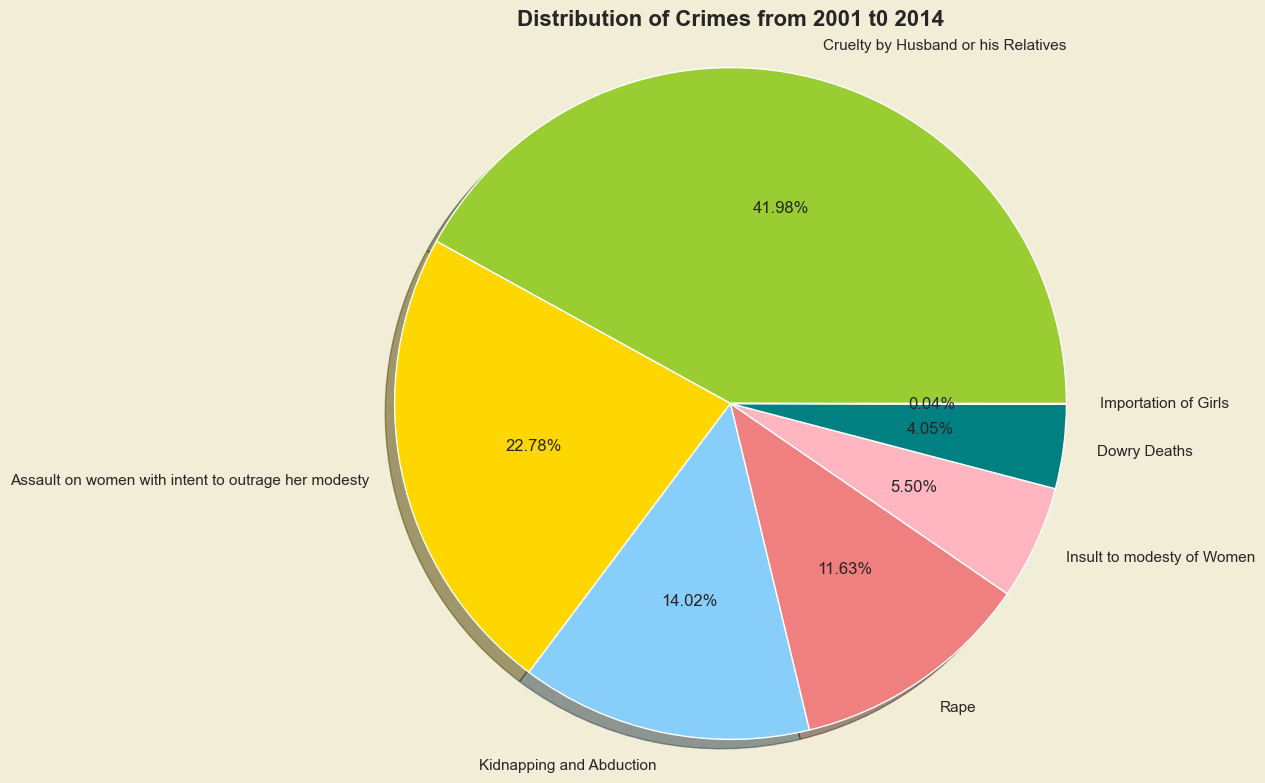

In [16]:
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls']

df_top_crimes=pd.DataFrame(columns=['crimes',"total"])
for i in crimes:
    df_top_crimes=df_top_crimes.append({'crimes':i ,'total':df[i].sum(axis=0)},ignore_index=True)
    
df_top_crimes=df_top_crimes.sort_values(by='total',ascending=False)

df_top_crimes

list_crimes_number=list(df_top_crimes['total'])
list_crimes=list(df_top_crimes['crimes'])
fig=plt.figure(figsize=(12,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','lightpink','teal','green']
#patches,text=plt.pie(list_crimes_number,colors=colors,labels=list_crimes_number,autopct='%1.1f%%')
plt.pie(list_crimes_number,colors=colors,labels=list_crimes,autopct='%1.2f%%',shadow=True)
#plt.legend()
plt.title("Distribution of Crimes from 2001 t0 2014",fontweight='bold',fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

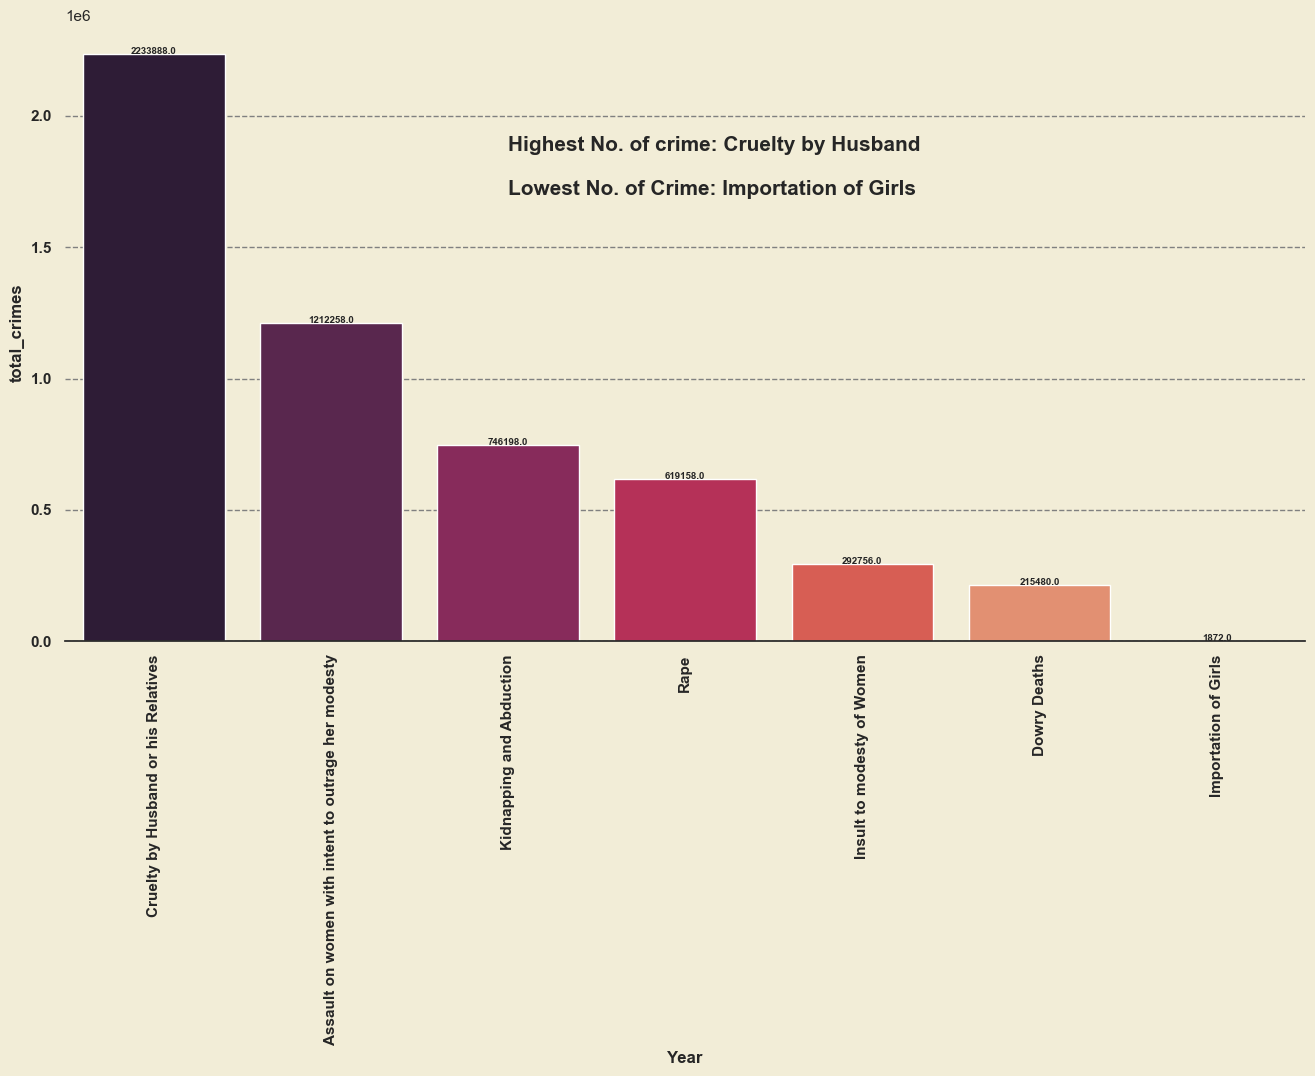

In [17]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df_top_crimes,y='total',x='crimes',palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
#plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.text(2,1700000, "Highest No. of crime: Cruelty by Husband\n\nLowest No. of Crime: Importation of Girls",fontweight='bold',fontsize=15)
without_hue(df_top_crimes,'total',a)
plt.show()

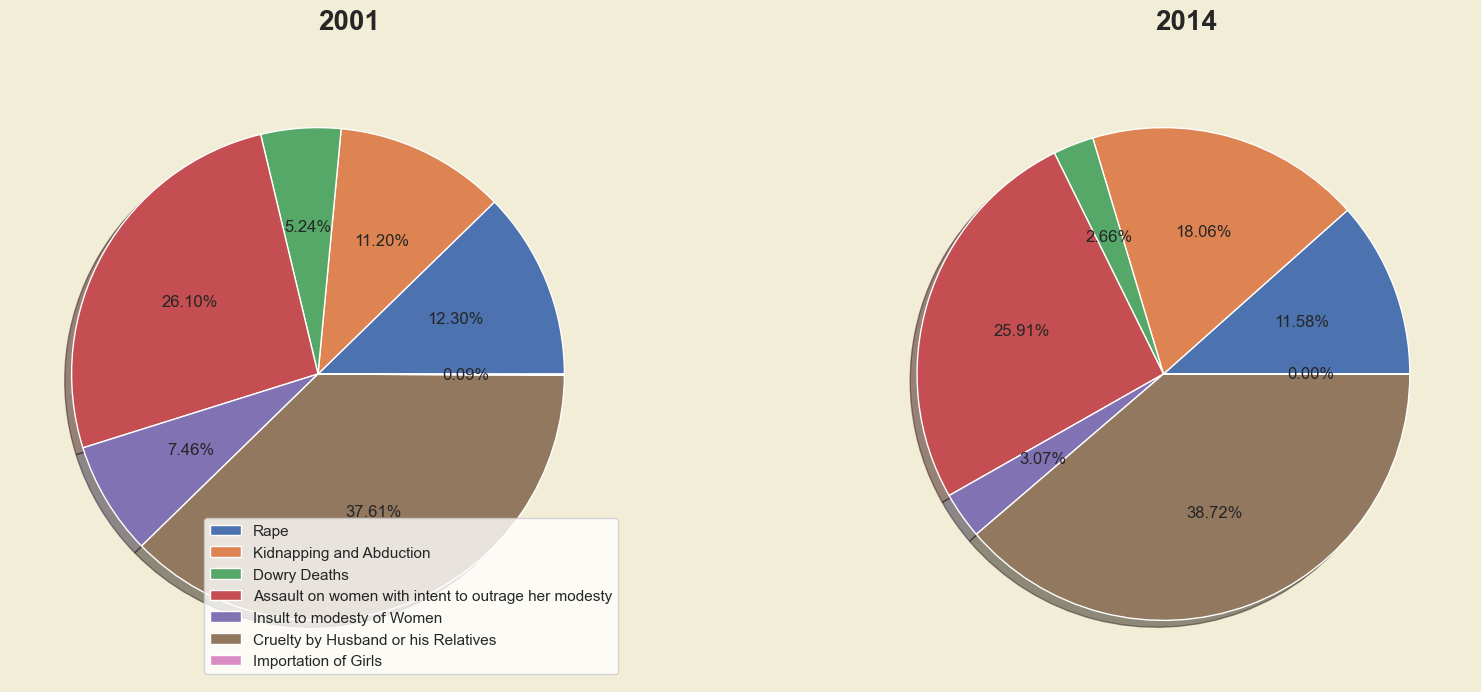

In [18]:
df_2001=df1.loc[df1.index==2001]
df_2014=df1.loc[df1.index==2014]

df_2001=df_2001.drop(["total_crimes"],axis=1)
df_2014=df_2014.drop(["total_crimes"],axis=1)
crimes_in_2001=list(df_2001.iloc[0])
crimes_in_2014=list(df_2014.iloc[0])

f,ax=plt.subplots(1,2,figsize=(20,8))
f.patch.set_facecolor('#F2EDD7FF')
#Setting background and foreground color
for j in range(0,2):
    ax[j].set_facecolor('#F2EDD7FF')
    
ax[0].pie(crimes_in_2001,autopct='%1.2f%%',shadow=True)
ax[0].text(0,1.4,"2001",fontweight='bold',fontsize=20)
ax[1].pie(crimes_in_2014,autopct='%1.2f%%',shadow=True)
ax[0].text(3.4,1.4,"2014",fontweight='bold',fontsize=20)
ax[0].legend(labels=df_2001.columns,loc='lower right')

plt.show()

In [19]:
print("***** Total number of Unique States/Union Territories we have in Data *****")
print()
states=df['STATE/UT'].unique()
print("Number of states/territories without duplicates: ", len(states))
print()
print(states)

***** Total number of Unique States/Union Territories we have in Data *****

Number of states/territories without duplicates:  36

['andhrapradesh' 'arunachalpradesh' 'assam' 'bihar' 'chhattisgarh' 'goa'
 'gujarat' 'haryana' 'himachalpradesh' 'jammu&kashmir' 'jharkhand'
 'karnataka' 'kerala' 'madhyapradesh' 'maharashtra' 'manipur' 'meghalaya'
 'mizoram' 'nagaland' 'odisha' 'punjab' 'rajasthan' 'sikkim' 'tamilnadu'
 'tripura' 'uttarpradesh' 'uttarakhand' 'westbengal' 'a&nislands'
 'chandigarh' 'd&nhaveli' 'daman&diu' 'delhi' 'lakshadweep' 'puducherry'
 'telangana']


In [20]:
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']

df_state=pd.DataFrame()
for i in crimes:
    df_state_crimes=df.groupby(['STATE/UT'])[i].sum()
    df_state[i]=df_state_crimes

print("***** Each cateogry of crimes in each state from 2001 to 2014 *****")
print()
df_state=df_state.sort_values(by='total_crimes',ascending=False)
df_state.reset_index()


***** Each cateogry of crimes in each state from 2001 to 2014 *****



,STATE/UT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
0,uttarpradesh,51150,135906,57256,91212,53130,193738,6,582398
1,andhrapradesh,32150,34504,13844,126952,86964,280906,34,575354
2,westbengal,47876,61158,12308,66908,5348,344124,254,537976
3,rajasthan,45684,66278,11854,83362,794,262200,14,470186
4,madhyapradesh,90996,35608,21090,195478,20964,102816,134,467086
5,maharashtra,48974,30368,9696,114704,32634,193202,6,429584
6,assam,40190,62074,3268,38256,254,115300,22,259364
7,kerala,20030,4452,700,80438,7930,111626,0,225176
8,gujarat,11644,34670,1108,23186,3230,146468,0,220306
9,bihar,30758,57086,32206,16958,694,69770,904,208376


In [21]:
def without_hue_state(data,feature,ax):
    
    total=data['total_crimes'].sum()
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,percentage,ha='center',fontweight='bold',fontsize=10)

        

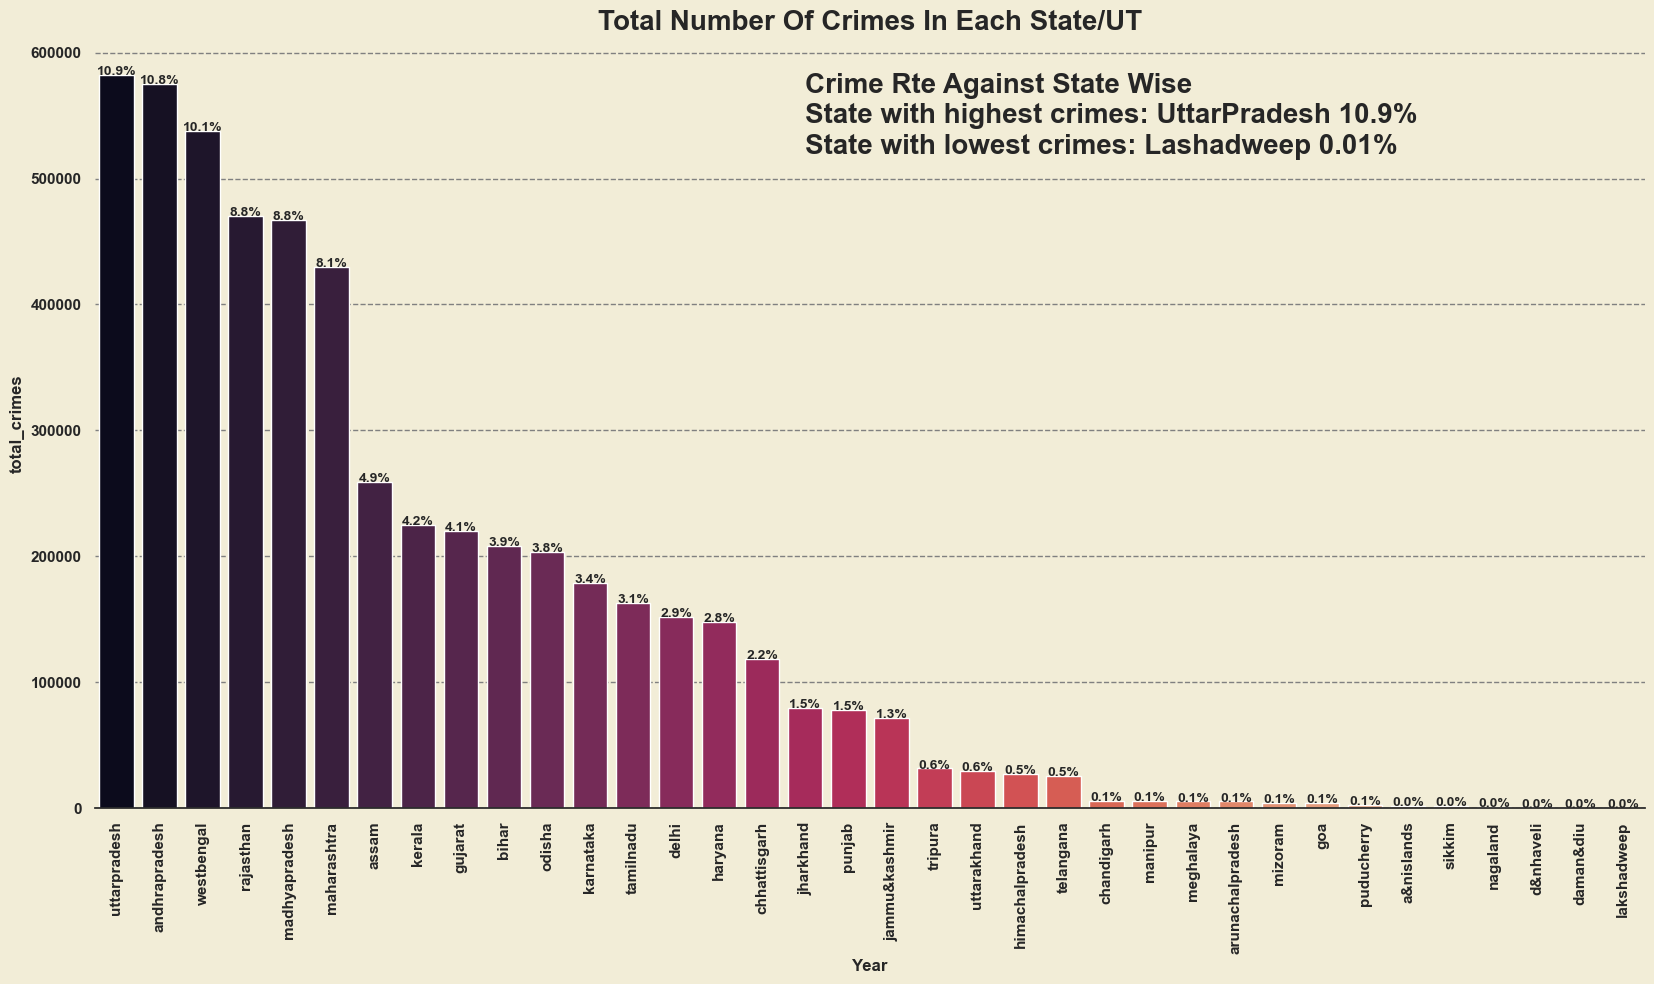

In [22]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(20,10))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df_state,x=df_state.index,y='total_crimes',palette='rocket')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(16,520000,"Crime Rte Against State Wise\nState with highest crimes: UttarPradesh 10.9%\nState with lowest crimes: Lashadweep 0.01%",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Each State/UT",fontweight='bold',fontsize=20)
without_hue_state(df_state,'total_crimes',a)
plt.show()

In [23]:
df_state.head()

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
STATE/UT,,,,,,,,
uttarpradesh,51150,135906,57256,91212,53130,193738,6,582398
andhrapradesh,32150,34504,13844,126952,86964,280906,34,575354
westbengal,47876,61158,12308,66908,5348,344124,254,537976
rajasthan,45684,66278,11854,83362,794,262200,14,470186
madhyapradesh,90996,35608,21090,195478,20964,102816,134,467086


In [24]:
df_state.tail()


,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
STATE/UT,,,,,,,,
sikkim,570,180,4,586,34,108,0,1482
nagaland,562,190,2,260,24,32,2,1072
d&nhaveli,132,224,2,106,12,90,0,566
daman&diu,60,44,6,40,4,76,0,230
lakshadweep,20,2,0,14,4,14,0,54


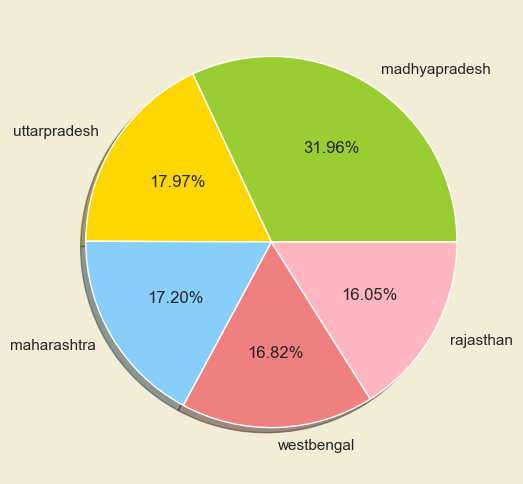

In [25]:
df_state_rape=df_state.sort_values(by="Rape",ascending=False)
df_highr=df_state_rape.iloc[:,0:1].head()
df_highr.reset_index(inplace=True)
fig=plt.figure(figsize=(20,5))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


plt.pie(df_highr["Rape"],colors=colors,labels=df_highr['STATE/UT'],autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.show()
#df_state_rape[df_state_rape.index,df_state_rape['Rape']].head()


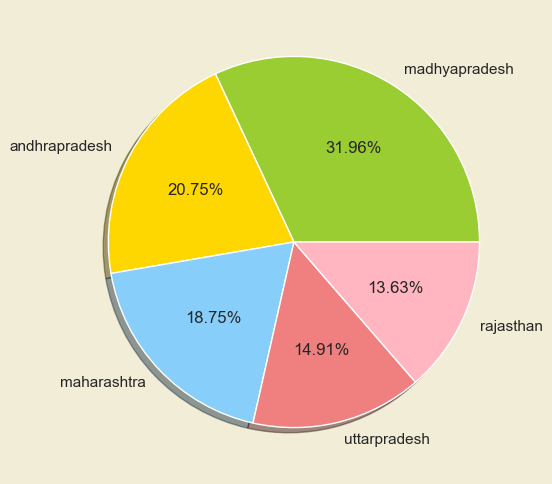

In [26]:
df_state_assault=df_state.sort_values(by='Assault on women with intent to outrage her modesty',ascending=False)
df_higha=df_state_assault.iloc[:,[3]].head()


fig=plt.figure(figsize=(20,5))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


plt.pie(df_higha['Assault on women with intent to outrage her modesty'],colors=colors,labels=df_higha.index,autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.show()



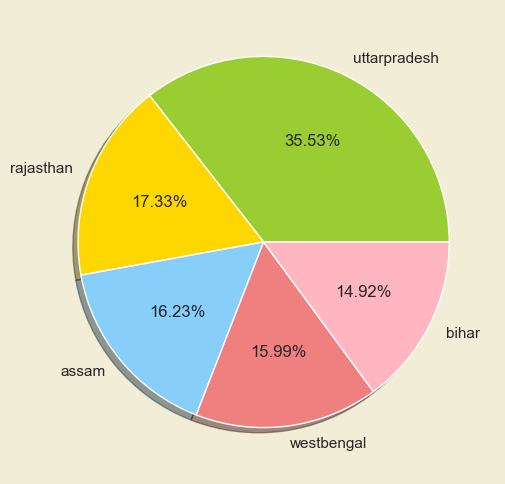

In [27]:
df_state_kidnapping=df_state.sort_values(by='Kidnapping and Abduction',ascending=False)
df_highk=df_state_kidnapping.iloc[:,[1]].head()


fig=plt.figure(figsize=(20,5))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


plt.pie(df_highk["Kidnapping and Abduction"],colors=colors,labels=df_highk.index,autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.show()


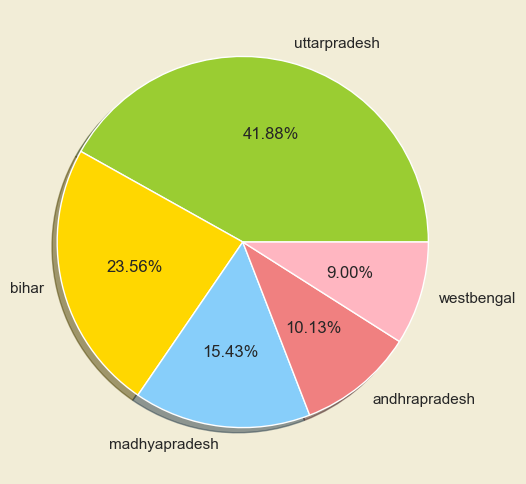

In [28]:
df_state_kidnapping=df_state.sort_values(by='Dowry Deaths',ascending=False)
df_highk=df_state_kidnapping.iloc[:,[2]].head()


fig=plt.figure(figsize=(20,5))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


plt.pie(df_highk["Dowry Deaths"],colors=colors,labels=df_highk.index,autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.show()


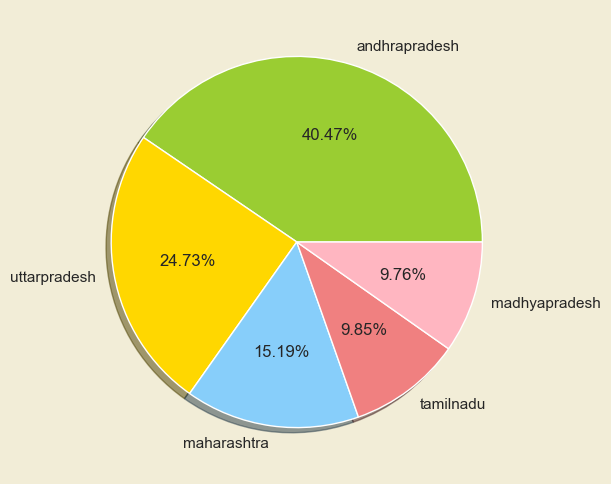

In [29]:
df_state_kidnapping=df_state.sort_values(by='Insult to modesty of Women',ascending=False)
df_highk=df_state_kidnapping.iloc[:,[4]].head()


fig=plt.figure(figsize=(20,5))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


plt.pie(df_highk['Insult to modesty of Women'],colors=colors,labels=df_highk.index,autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.show()


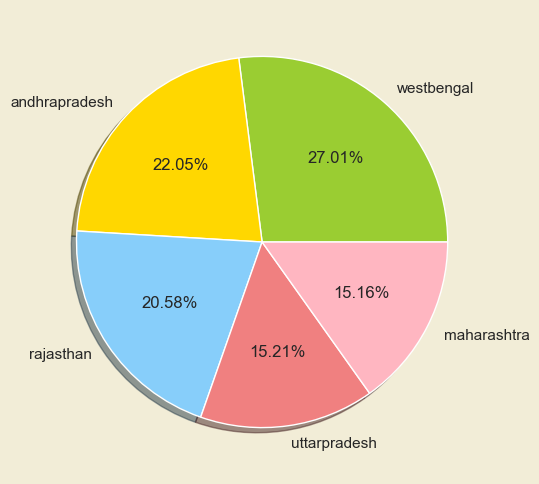

In [30]:
df_state_kidnapping=df_state.sort_values(by='Cruelty by Husband or his Relatives',ascending=False)
df_highk=df_state_kidnapping.iloc[:,[5]].head()


fig=plt.figure(figsize=(20,5))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


plt.pie(df_highk['Cruelty by Husband or his Relatives'],colors=colors,labels=df_highk.index,autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.show()


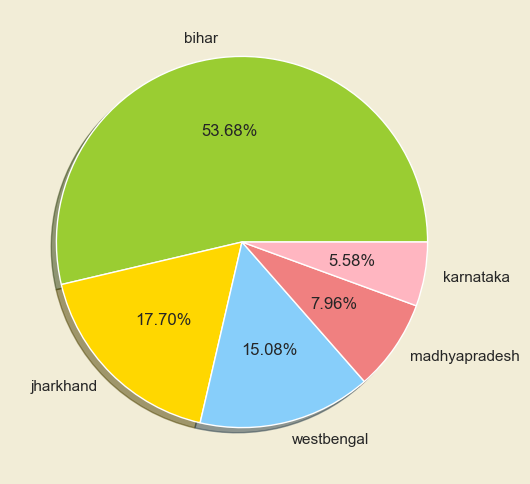

In [31]:
df_state_kidnapping=df_state.sort_values(by='Importation of Girls',ascending=False)
df_highk=df_state_kidnapping.iloc[:,[6]].head()


fig=plt.figure(figsize=(20,5))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


plt.pie(df_highk['Importation of Girls'],colors=colors,labels=df_highk.index,autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.show()


In [32]:
df_up=df_state.loc[df_state.index=='uttarpradesh']
df_up

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
STATE/UT,,,,,,,,
uttarpradesh,51150,135906,57256,91212,53130,193738,6,582398


In [33]:
crime_up=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls']

df_crime_up=pd.DataFrame(columns=['Crimes in UP',"total"])
for i in crime_up:
    df_crime_up=df_crime_up.append({'Crimes in UP':i ,'total':df_up[i].sum(axis=0)},ignore_index=True)
    
df_crime_up=df_crime_up.sort_values(by='total',ascending=False)

print("***** Total count of each crime from 2001 to 2014 in Uttar Pradesh *****")
print()
df_crime_up

***** Total count of each crime from 2001 to 2014 in Uttar Pradesh *****



C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\1392063184.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_crime_up=df_crime_up.append({'Crimes in UP':i ,'total':df_up[i].sum(axis=0)},ignore_index=True)
C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\1392063184.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_crime_up=df_crime_up.append({'Crimes in UP':i ,'total':df_up[i].sum(axis=0)},ignore_index=True)
C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\1392063184.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_crime_up=df_crime_up.append({'Crimes in UP':i ,'total':df_up[i].sum(axis=0)},ignore_index=True)
C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\1392063184.py:8: FutureWarning: The frame.appen

,Crimes in UP,total
5,Cruelty by Husband or his Relatives,193738
1,Kidnapping and Abduction,135906
3,Assault on women with intent to outrage her mo...,91212
2,Dowry Deaths,57256
4,Insult to modesty of Women,53130
0,Rape,51150
6,Importation of Girls,6


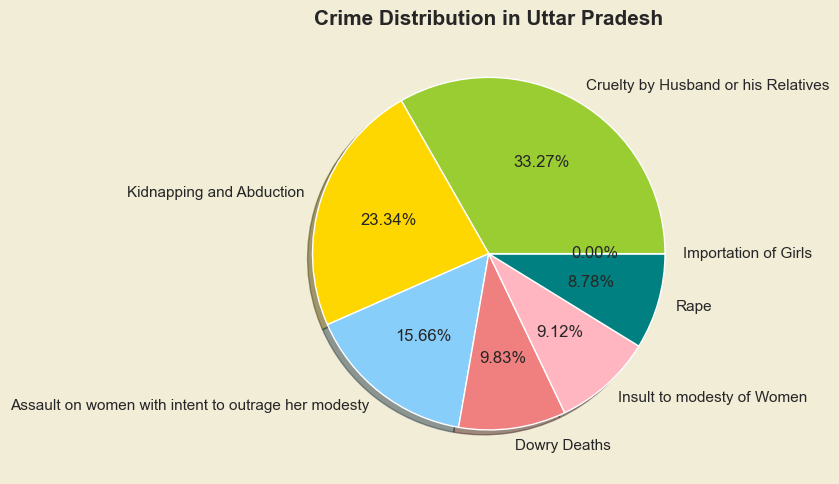

In [34]:
fig=plt.figure(figsize=(20,5))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


plt.pie(df_crime_up['total'],colors=colors,labels=df_crime_up['Crimes in UP'],autopct='%1.2f%%',shadow=True)
plt.title("Crime Distribution in Uttar Pradesh",fontweight='bold',fontsize=15)

plt.tight_layout()
plt.show()


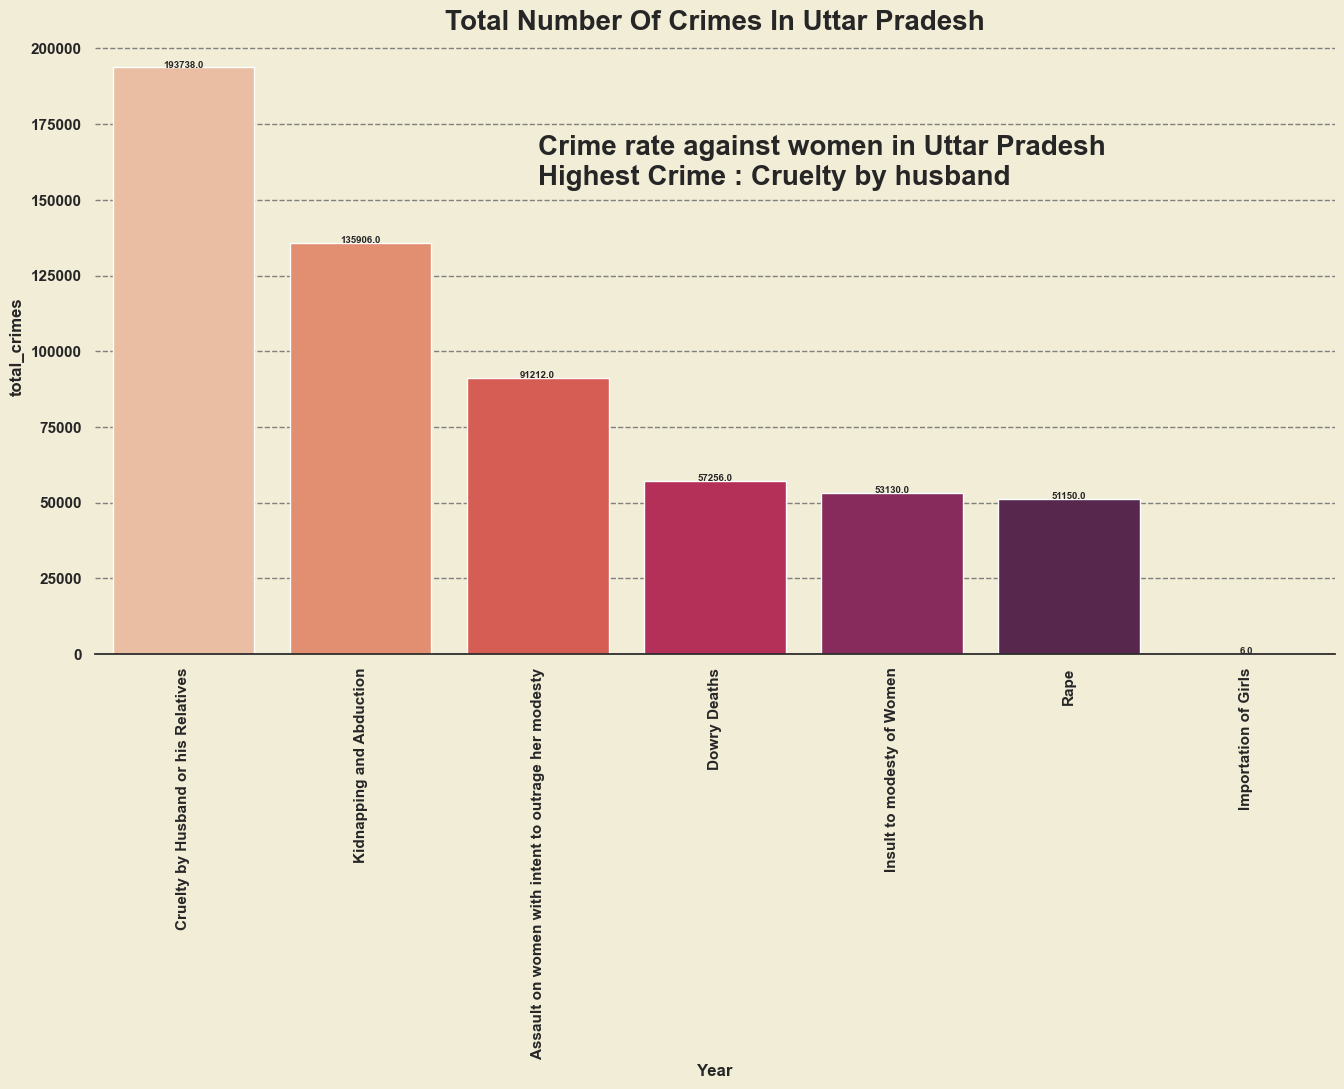

In [35]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df_crime_up,x="Crimes in UP",y='total',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(2,155000,"Crime rate against women in Uttar Pradesh\nHighest Crime : Cruelty by husband",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Uttar Pradesh",fontweight='bold',fontsize=20)
without_hue(df_crime_up,'total_crimes',a)
plt.show()

In [36]:
crime_up=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']

df_up_year=df.loc[df['STATE/UT']=='uttarpradesh']

df1_up_yearwise=pd.DataFrame()
for i in crime_up:
    df_crimes_up=df_up_year.groupby(['Year'])[i].sum()
    df1_up_yearwise[i]=df_crimes_up

print("***** Total number of crimes from in Uttar Pradesh year wise 2001 to 2014*****")
print()
df1_up_yearwise=df1_up_yearwise.sort_values(by='total_crimes',ascending=False)
df1_up_yearwise

***** Total number of crimes from in Uttar Pradesh year wise 2001 to 2014*****



,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
Year,,,,,,,,
2014,6934,21252,4938,17210,58,20942,0,71334
2013,6100,19474,4670,14606,50,17562,0,62462
2008,3742,8878,4474,5910,6748,16624,0,46376
2012,3926,15820,4488,6494,16,15322,0,46066
2009,3518,10156,4464,5564,5048,17132,0,45882
2011,4084,15050,4644,6910,6,14242,0,44936
2007,3296,6726,4152,5044,5764,15300,0,40282
2010,3126,10936,4434,5586,22,15956,0,40060
2001,3916,5758,4422,5740,5150,14730,0,39716


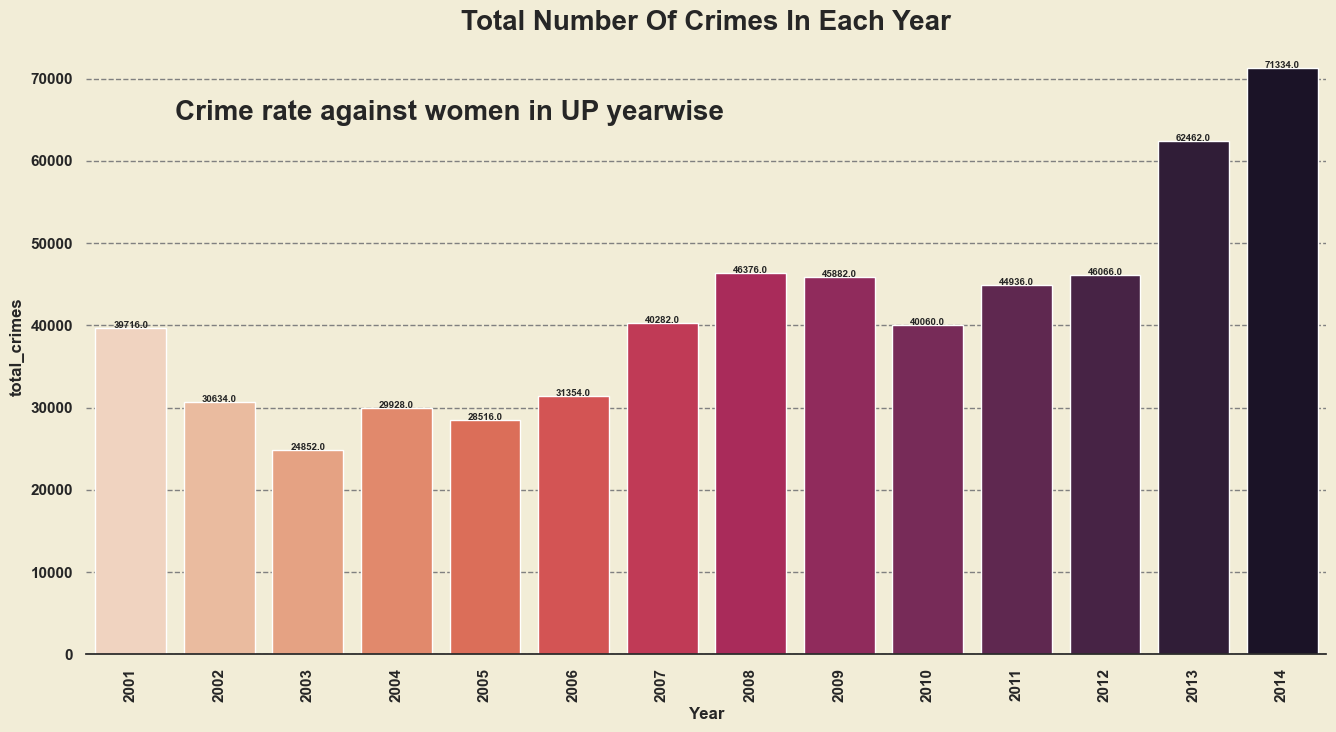

In [37]:
fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df1_up_yearwise,x=df1_up_yearwise.index,y='total_crimes',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(0.5,65000,"Crime rate against women in UP yearwise",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Each Year",fontweight='bold',fontsize=20)
without_hue(df1_up_yearwise,'total_crimes',a)
plt.show()

C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\3375811578.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


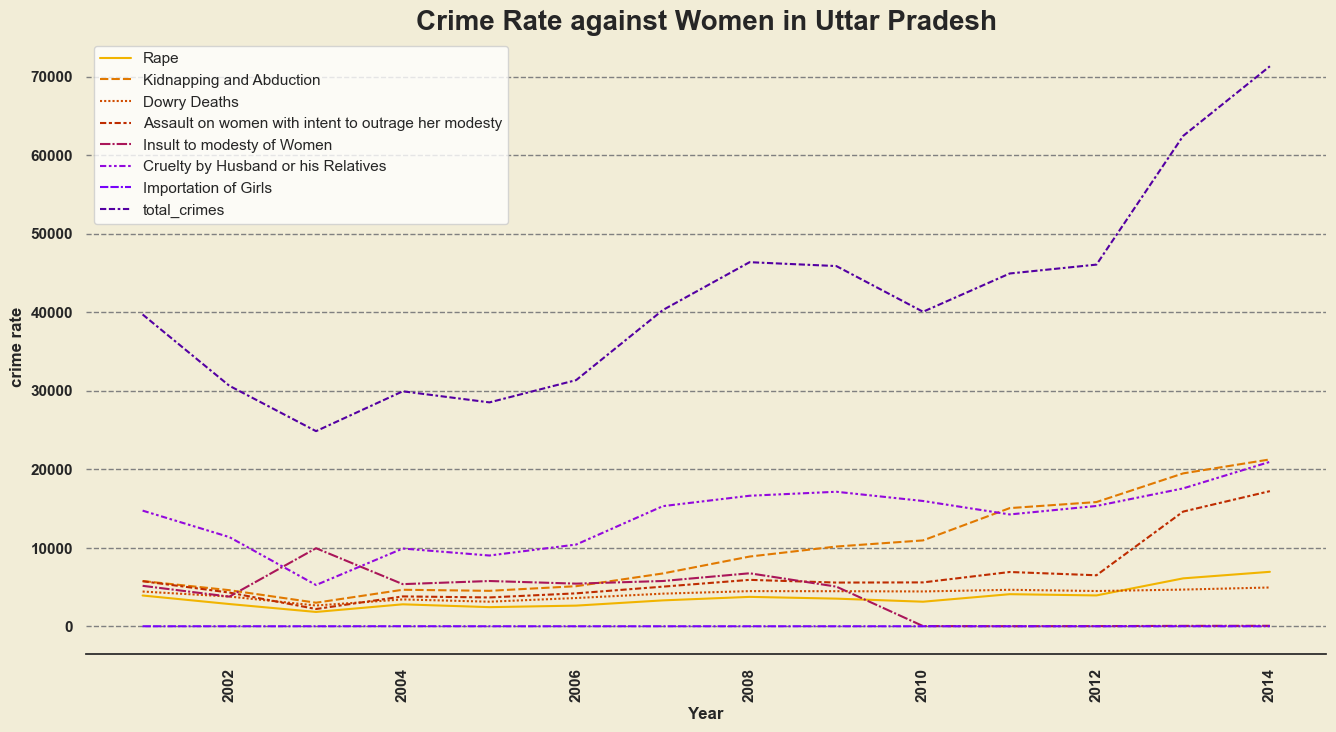

In [38]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

lower_year=2001
upper_year=2014
arr=[]
for i in range(lower_year,upper_year+1):
    arr.append(i)
arr=np.array(arr)

a=sns.lineplot(data=df1_up_yearwise,palette='gnuplot_r',linestyle="dashed")#,x=arr,y='Rape',hue_order=crimes,palette='rocket_r')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("crime rate",fontweight='bold')
plt.title("Crime Rate against Women in Uttar Pradesh",fontweight='bold',fontsize=20)
plt.show()

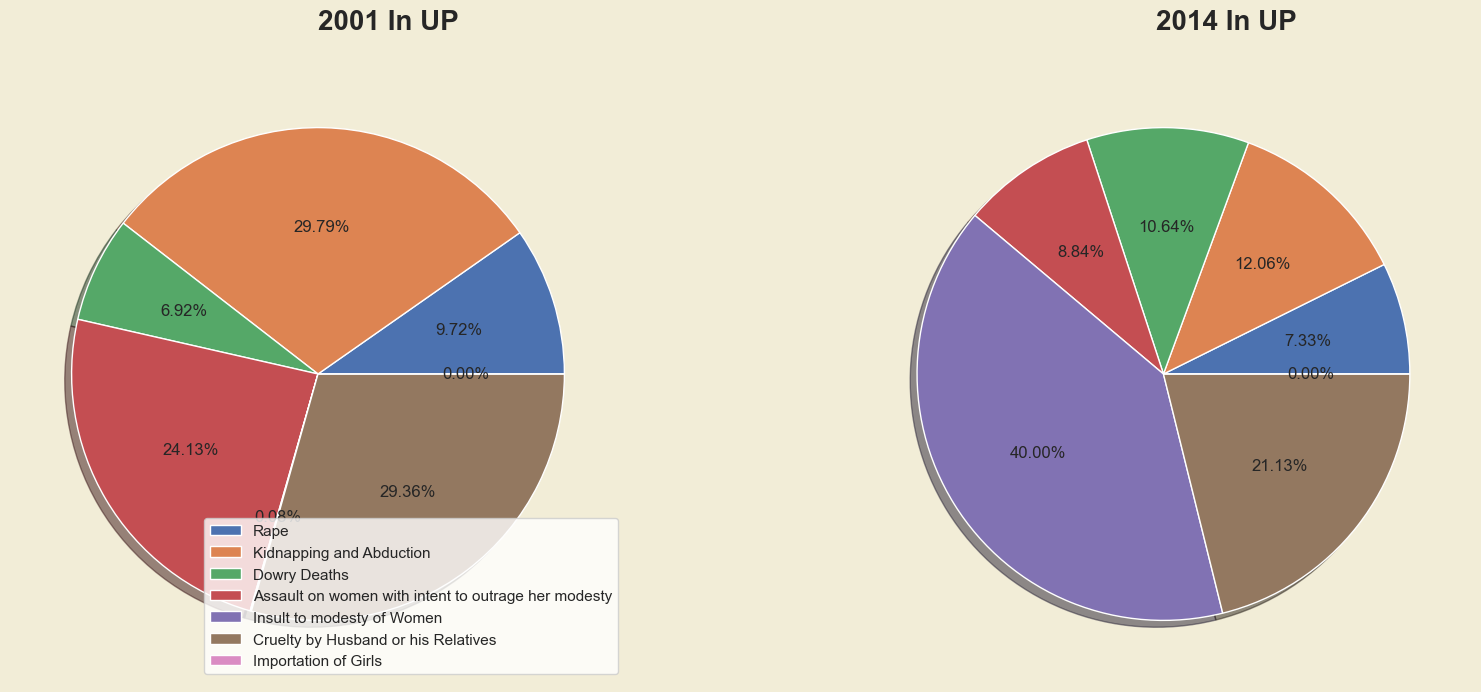

In [39]:
df_2001=df1_up_yearwise.loc[df1.index==2001]
df_2014=df1_up_yearwise.loc[df1.index==2014]

df_2001=df_2001.drop(["total_crimes"],axis=1)
df_2014=df_2014.drop(["total_crimes"],axis=1)
crimes_in_2001=list(df_2001.iloc[0])
crimes_in_2014=list(df_2014.iloc[0])

f,ax=plt.subplots(1,2,figsize=(20,8))
f.patch.set_facecolor('#F2EDD7FF')
#Setting background and foreground color
for j in range(0,2):
    ax[j].set_facecolor('#F2EDD7FF')
    
ax[0].pie(crimes_in_2001,autopct='%1.2f%%',shadow=True)
ax[0].text(0,1.4,"2001 In UP",fontweight='bold',fontsize=20)
ax[1].pie(crimes_in_2014,autopct='%1.2f%%',shadow=True)
ax[0].text(3.4,1.4,"2014 In UP",fontweight='bold',fontsize=20)
ax[0].legend(labels=df_2001.columns,loc='lower right')

plt.show()

In [40]:
df_ap=df_state.loc[df_state.index=='andhrapradesh']
crime_ap=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls']

df_crime_ap=pd.DataFrame(columns=['Crimes in AP',"total"])
for i in crime_ap:
    df_crime_ap=df_crime_ap.append({'Crimes in AP':i ,'total':df_ap[i].sum(axis=0)},ignore_index=True)
    
df_crime_ap=df_crime_ap.sort_values(by='total',ascending=False)

print("***** Total count of each crime from 2001 to 2014 in Andhra Pradesh *****")
print()
df_crime_ap

***** Total count of each crime from 2001 to 2014 in Andhra Pradesh *****



C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\1982173691.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_crime_ap=df_crime_ap.append({'Crimes in AP':i ,'total':df_ap[i].sum(axis=0)},ignore_index=True)
C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\1982173691.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_crime_ap=df_crime_ap.append({'Crimes in AP':i ,'total':df_ap[i].sum(axis=0)},ignore_index=True)
C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\1982173691.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_crime_ap=df_crime_ap.append({'Crimes in AP':i ,'total':df_ap[i].sum(axis=0)},ignore_index=True)
C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\1982173691.py:9: FutureWarning: The frame.appen

,Crimes in AP,total
5,Cruelty by Husband or his Relatives,280906
3,Assault on women with intent to outrage her mo...,126952
4,Insult to modesty of Women,86964
1,Kidnapping and Abduction,34504
0,Rape,32150
2,Dowry Deaths,13844
6,Importation of Girls,34


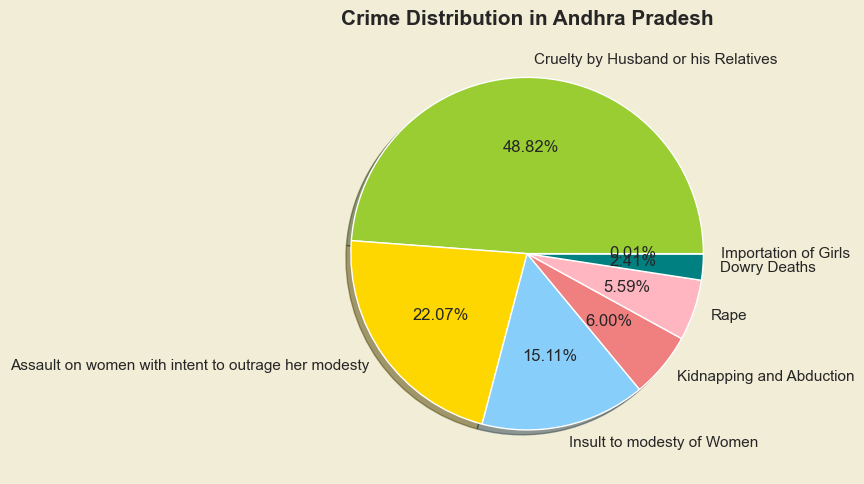

In [41]:
fig=plt.figure(figsize=(20,5))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


plt.pie(df_crime_ap['total'],colors=colors,labels=df_crime_ap['Crimes in AP'],autopct='%1.2f%%',shadow=True)
plt.title("Crime Distribution in Andhra Pradesh",fontweight='bold',fontsize=15)
plt.tight_layout()
plt.show()


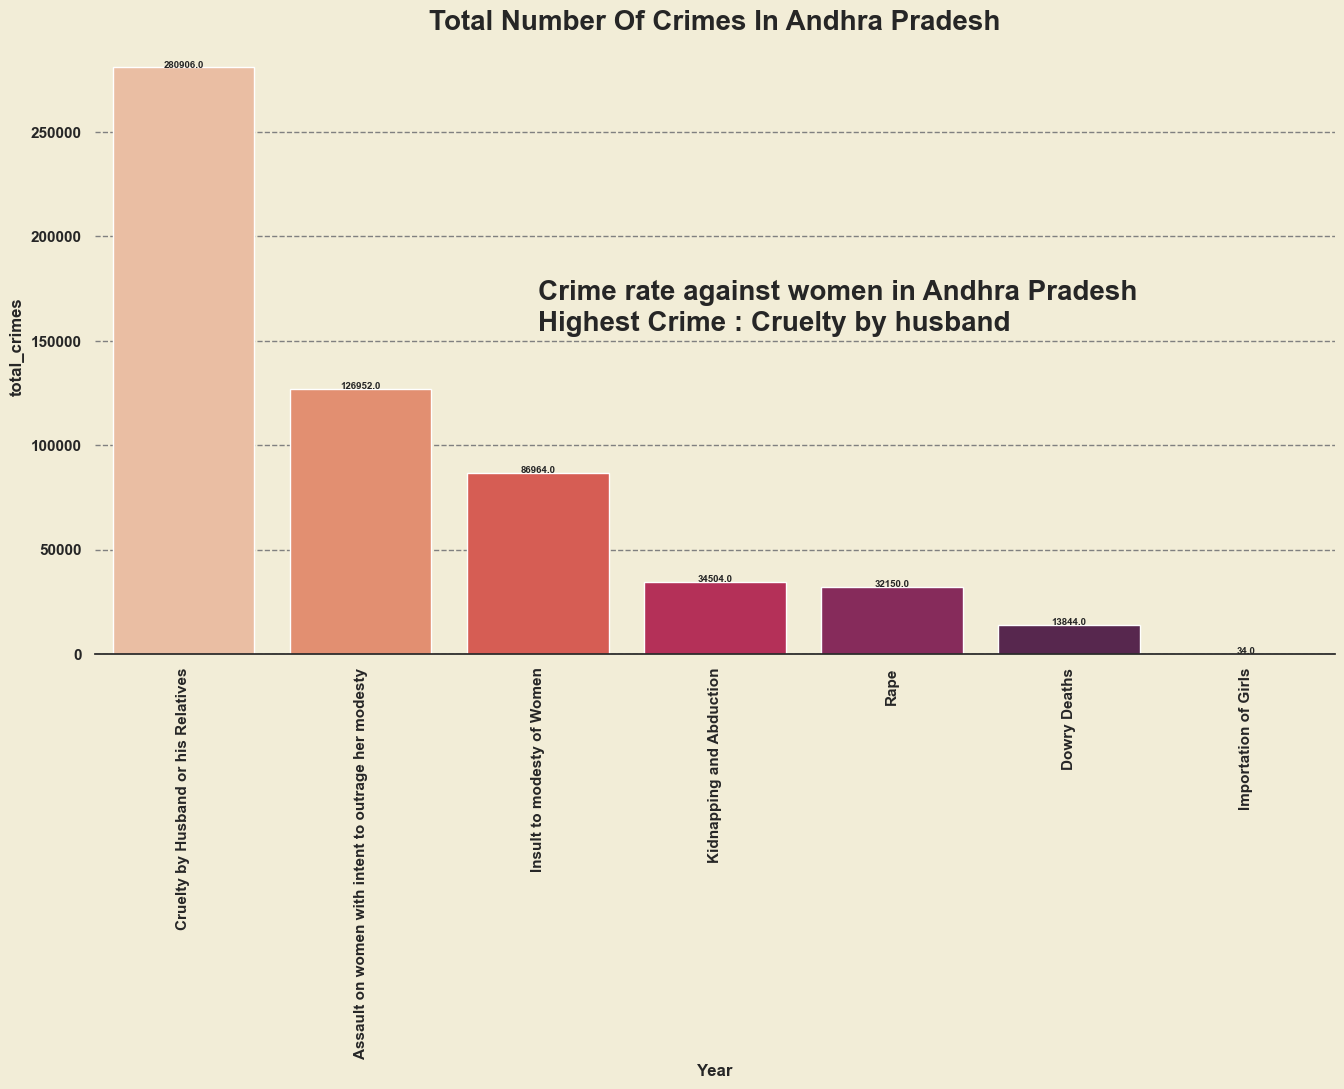

In [42]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df_crime_ap,x="Crimes in AP",y='total',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(2,155000,"Crime rate against women in Andhra Pradesh\nHighest Crime : Cruelty by husband",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Andhra Pradesh",fontweight='bold',fontsize=20)
without_hue(df_crime_ap,'total_crimes',a)
plt.show()

In [43]:
crime_ap=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']

df_ap_year=df.loc[df['STATE/UT']=='andhrapradesh']

df1_ap_yearwise=pd.DataFrame()
for i in crime_ap:
    df_crimes_ap=df_ap_year.groupby(['Year'])[i].sum()
    df1_ap_yearwise[i]=df_crimes_ap

print("***** Total number of crimes from in Andhra Pradesh year wise 2001 to 2014*****")
print()
df1_ap_yearwise=df1_ap_yearwise.sort_values(by='total_crimes',ascending=False)
df1_ap_yearwise

***** Total number of crimes from in Andhra Pradesh year wise 2001 to 2014*****



,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
Year,,,,,,,,
2013,3270,3190,984,13860,9404,30168,0,60876
2011,2884,3224,1198,9698,7316,26752,0,51072
2012,2682,2806,1008,9632,7428,26778,0,50334
2010,2724,3062,1176,9268,9124,24160,0,49514
2009,2376,3052,1092,10294,7040,22594,0,46448
2007,2140,3128,1226,8812,6632,22670,0,44608
2008,2514,2792,1112,9460,7102,20612,0,43592
2006,2098,2658,1038,9068,4822,18328,0,38012
2005,1870,1990,886,7190,5016,17392,6,34350


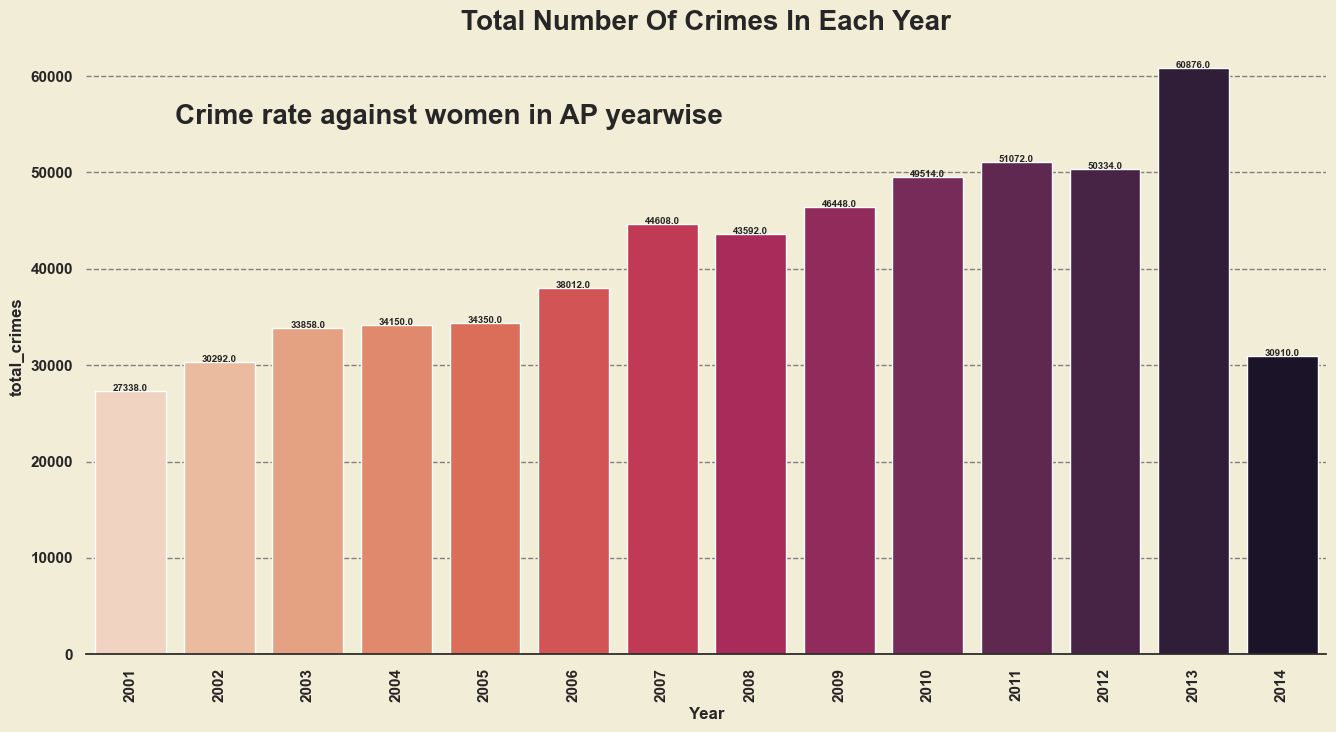

In [44]:
fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df1_ap_yearwise,x=df1_ap_yearwise.index,y='total_crimes',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(0.5,55000,"Crime rate against women in AP yearwise",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Each Year",fontweight='bold',fontsize=20)
without_hue(df1_ap_yearwise,'total_crimes',a)
plt.show()

C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\1022884625.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


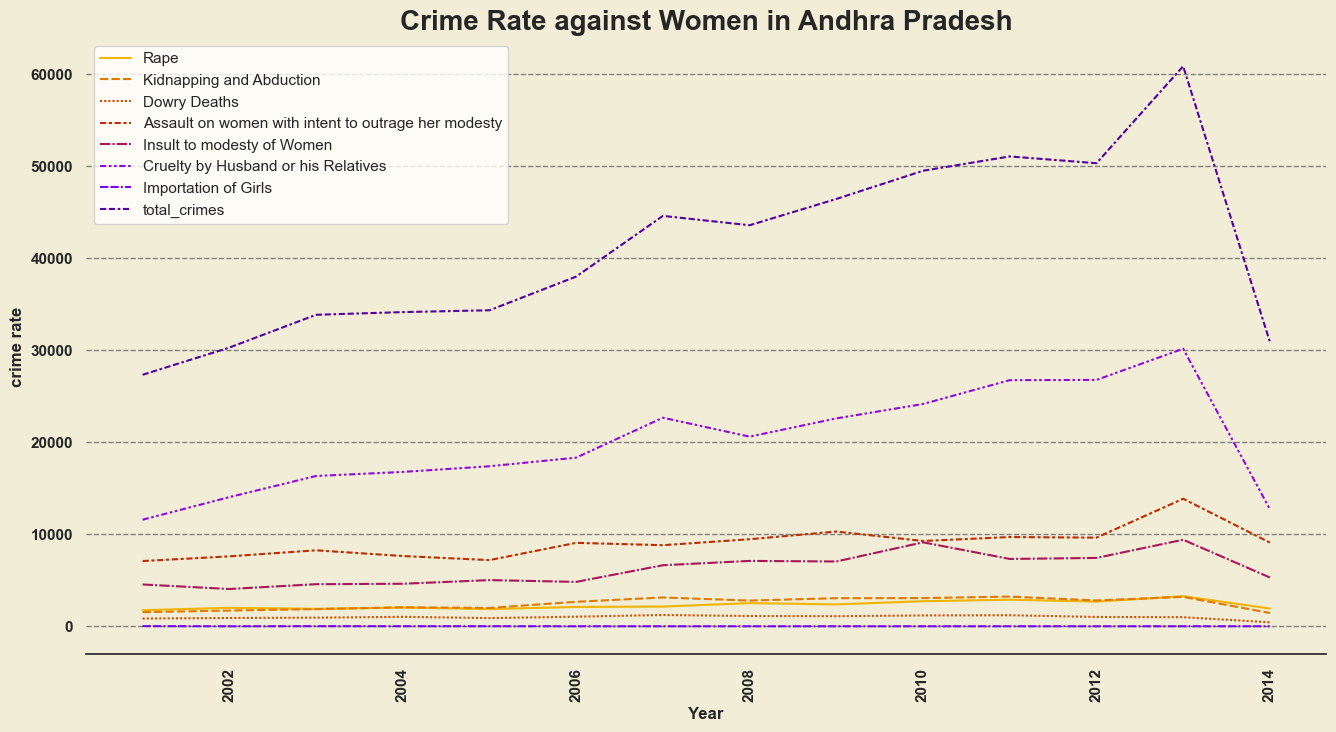

In [45]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.lineplot(data=df1_ap_yearwise,palette='gnuplot_r',linestyle="dashed")#,x=arr,y='Rape',hue_order=crimes,palette='rocket_r')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("crime rate",fontweight='bold')
plt.title("Crime Rate against Women in Andhra Pradesh",fontweight='bold',fontsize=20)
plt.show()

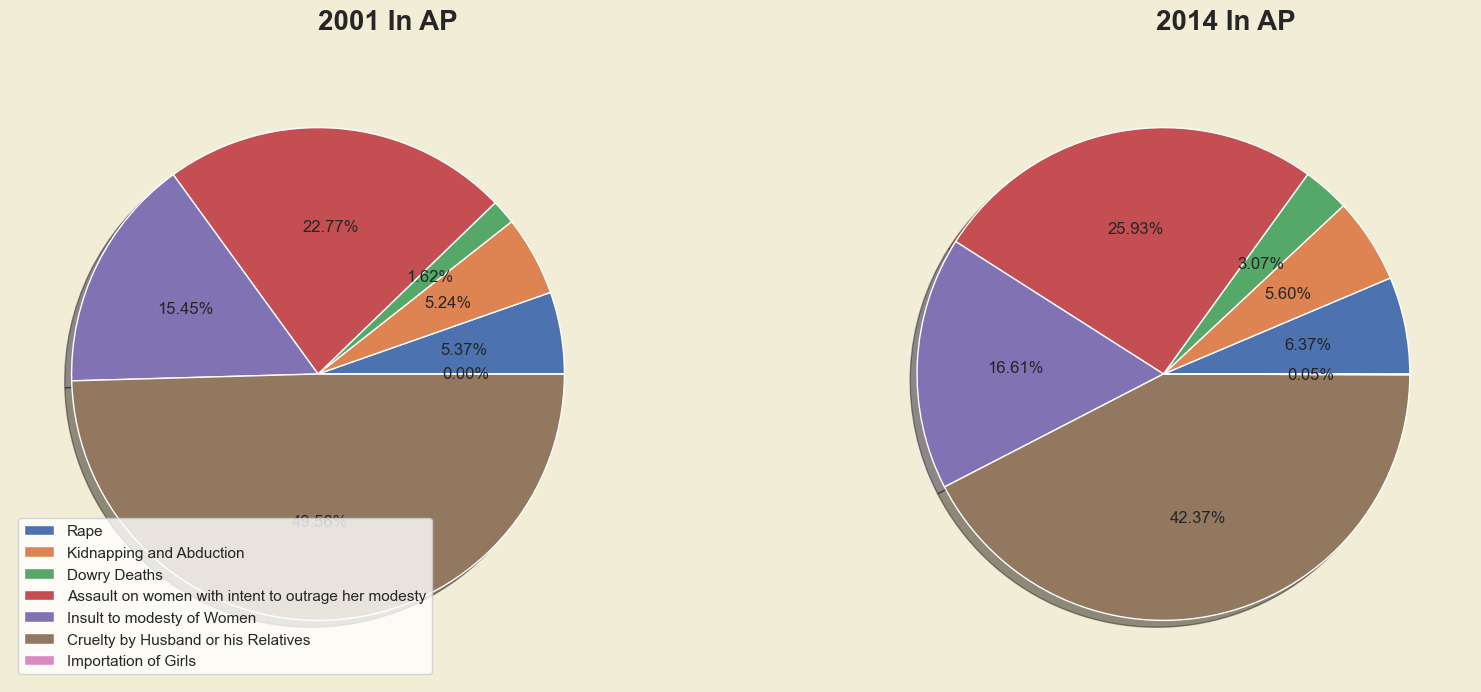

In [46]:
df_2001=df1_ap_yearwise.loc[df1.index==2001]
df_2014=df1_ap_yearwise.loc[df1.index==2014]

df_2001=df_2001.drop(["total_crimes"],axis=1)
df_2014=df_2014.drop(["total_crimes"],axis=1)
crimes_in_2001=list(df_2001.iloc[0])
crimes_in_2014=list(df_2014.iloc[0])

f,ax=plt.subplots(1,2,figsize=(20,8))
f.patch.set_facecolor('#F2EDD7FF')
#Setting background and foreground color
for j in range(0,2):
    ax[j].set_facecolor('#F2EDD7FF')
    
ax[0].pie(crimes_in_2001,autopct='%1.2f%%',shadow=True)
ax[0].text(0,1.4,"2001 In AP",fontweight='bold',fontsize=20)
ax[1].pie(crimes_in_2014,autopct='%1.2f%%',shadow=True)
ax[0].text(3.4,1.4,"2014 In AP",fontweight='bold',fontsize=20)
ax[0].legend(labels=df_2001.columns,loc='best')

plt.show()

In [47]:
df_wb=df_state.loc[df_state.index=='westbengal']
crime_wb=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls']

df_crime_wb=pd.DataFrame(columns=['Crimes in WB',"total"])
for i in crime_wb:
    df_crime_wb=df_crime_wb.append({'Crimes in WB':i ,'total':df_wb[i].sum(axis=0)},ignore_index=True)
    
df_crime_wb=df_crime_wb.sort_values(by='total',ascending=False)

print("***** Total count of each crime from 2001 to 2014 in West Bengal *****")
print()
df_crime_wb

***** Total count of each crime from 2001 to 2014 in West Bengal *****



C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\1884618867.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_crime_wb=df_crime_wb.append({'Crimes in WB':i ,'total':df_wb[i].sum(axis=0)},ignore_index=True)
C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\1884618867.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_crime_wb=df_crime_wb.append({'Crimes in WB':i ,'total':df_wb[i].sum(axis=0)},ignore_index=True)
C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\1884618867.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_crime_wb=df_crime_wb.append({'Crimes in WB':i ,'total':df_wb[i].sum(axis=0)},ignore_index=True)
C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\1884618867.py:9: FutureWarning: The frame.appen

,Crimes in WB,total
5,Cruelty by Husband or his Relatives,344124
3,Assault on women with intent to outrage her mo...,66908
1,Kidnapping and Abduction,61158
0,Rape,47876
2,Dowry Deaths,12308
4,Insult to modesty of Women,5348
6,Importation of Girls,254


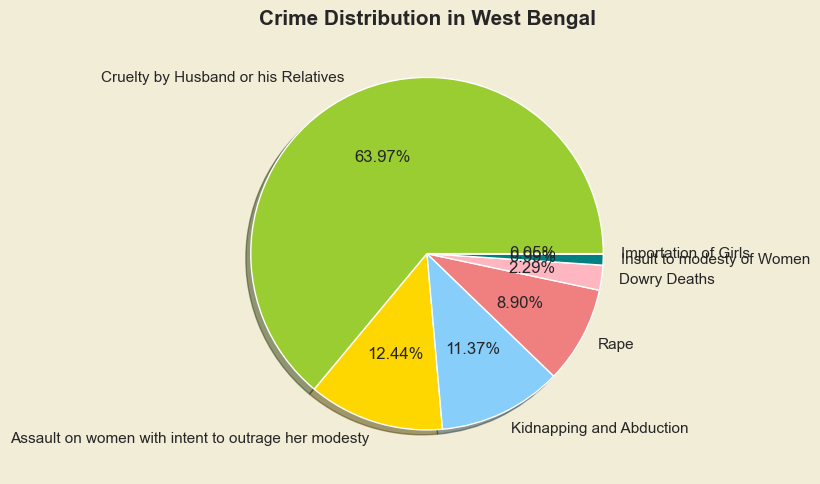

In [48]:
fig=plt.figure(figsize=(20,5))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


plt.pie(df_crime_wb['total'],colors=colors,labels=df_crime_wb['Crimes in WB'],autopct='%1.2f%%',shadow=True)
plt.title("Crime Distribution in West Bengal",fontweight='bold',fontsize=15)
plt.tight_layout()
plt.show()


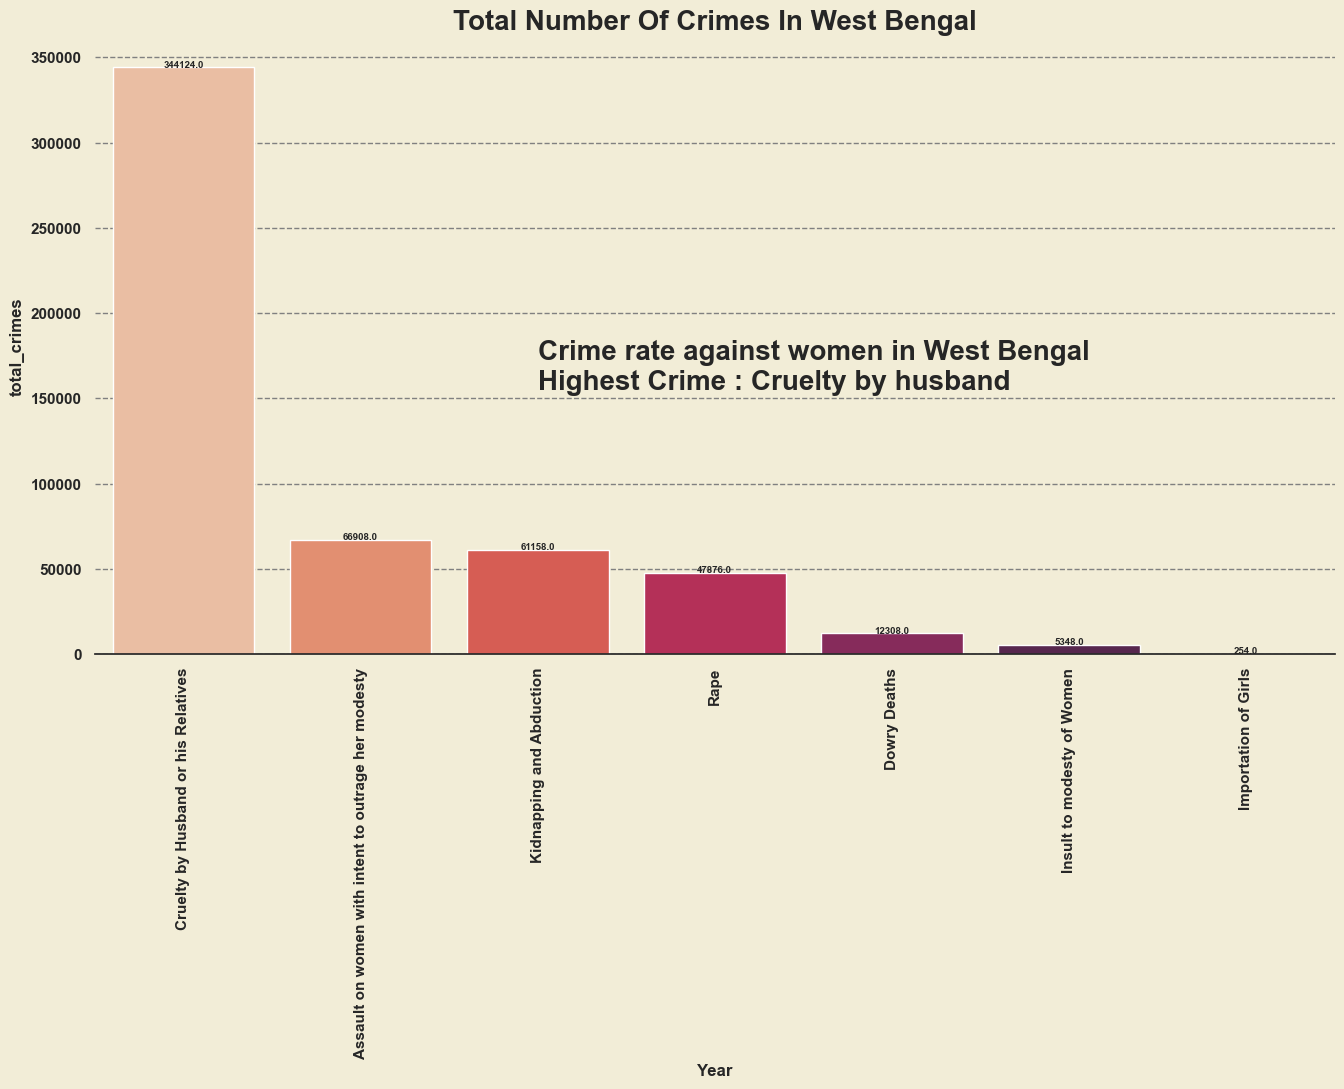

In [49]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df_crime_wb,x="Crimes in WB",y='total',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(2,155000,"Crime rate against women in West Bengal\nHighest Crime : Cruelty by husband",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In West Bengal",fontweight='bold',fontsize=20)
without_hue(df_crime_wb,'total_crimes',a)
plt.show()

***** Total number of crimes from in Andhra Pradesh year wise 2001 to 2014*****



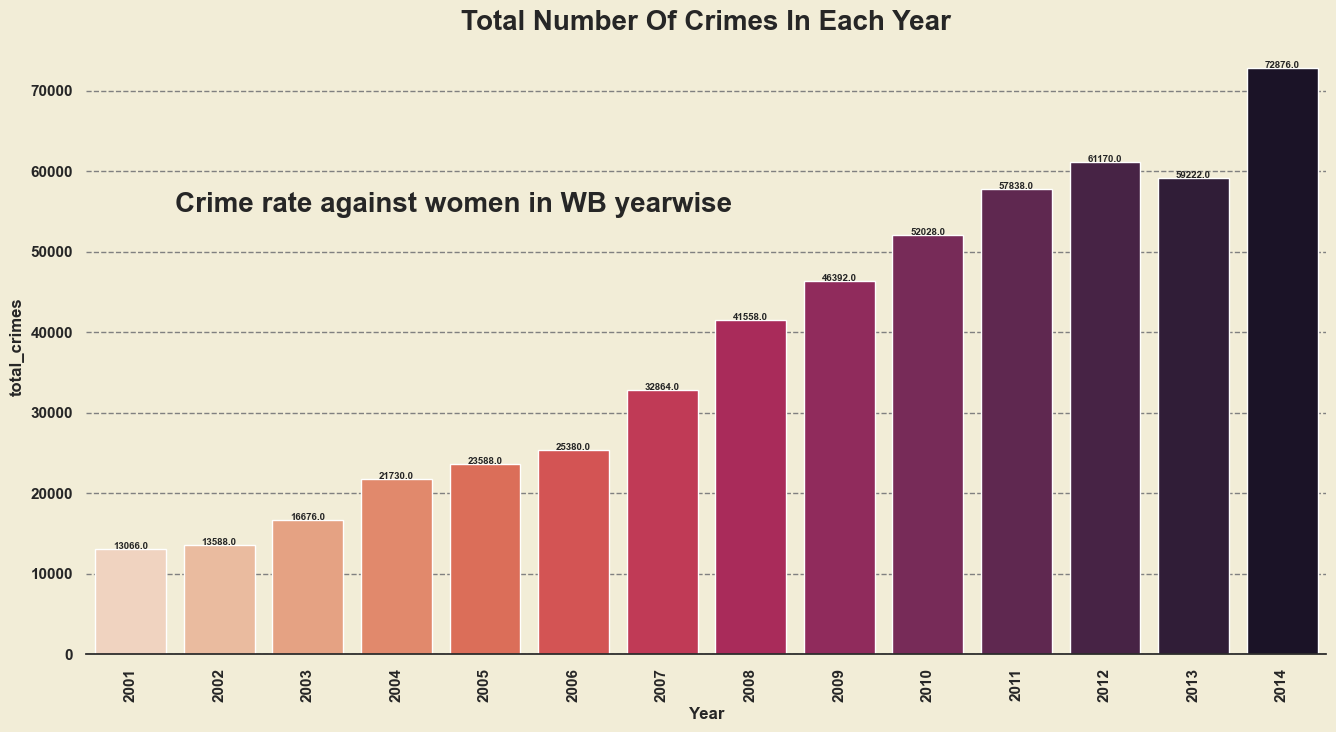

In [50]:
crime_wb=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']

df_wb_year=df.loc[df['STATE/UT']=='westbengal']

df1_wb_yearwise=pd.DataFrame()
for i in crime_wb:
    df_crimes_wb=df_wb_year.groupby(['Year'])[i].sum()
    df1_wb_yearwise[i]=df_crimes_wb

print("***** Total number of crimes from in Andhra Pradesh year wise 2001 to 2014*****")
print()
df1_wb_yearwise=df1_wb_yearwise.sort_values(by='total_crimes',ascending=False)
#df1_wb_yearwise
fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df1_wb_yearwise,x=df1_wb_yearwise.index,y='total_crimes',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(0.5,55000,"Crime rate against women in WB yearwise",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Each Year",fontweight='bold',fontsize=20)
without_hue(df1_wb_yearwise,'total_crimes',a)
plt.show()

C:\Users\yadwa\AppData\Local\Temp\ipykernel_10368\3147932016.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


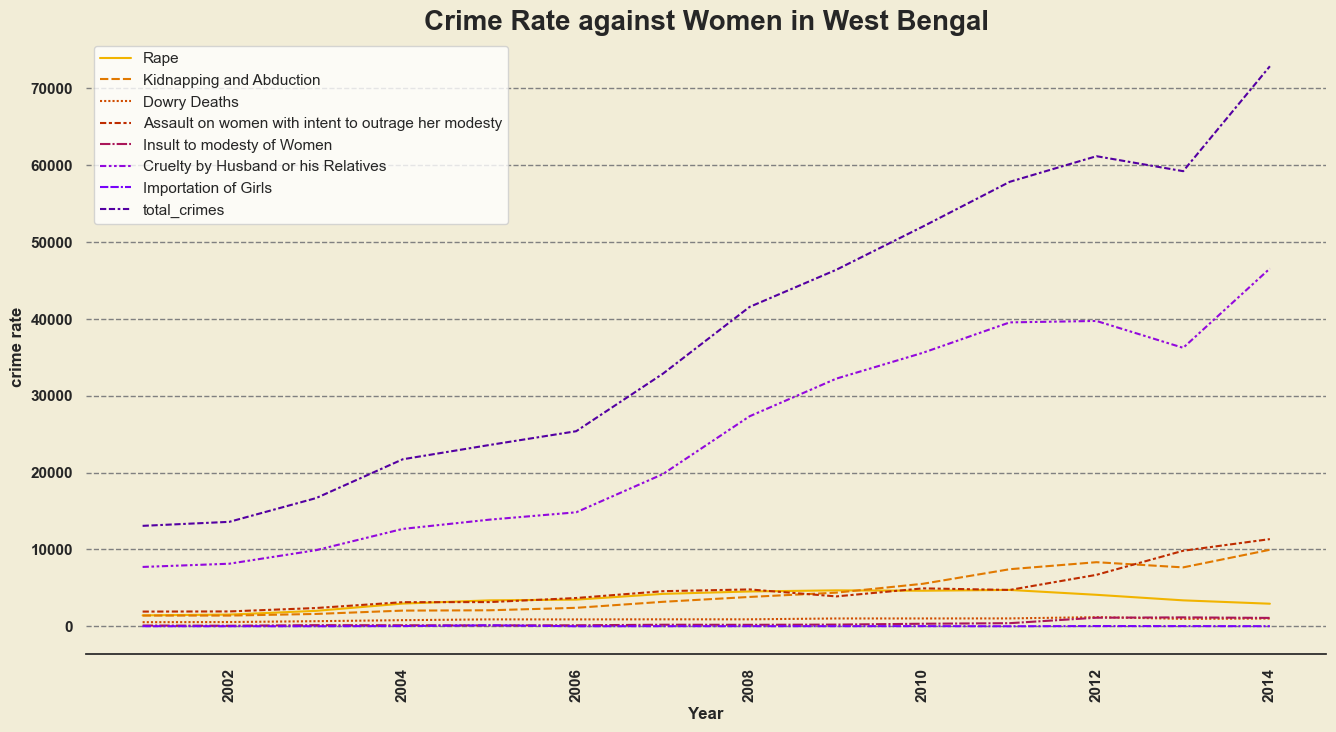

In [51]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.lineplot(data=df1_wb_yearwise,palette='gnuplot_r',linestyle="dashed")#,x=arr,y='Rape',hue_order=crimes,palette='rocket_r')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("crime rate",fontweight='bold')
plt.title("Crime Rate against Women in West Bengal",fontweight='bold',fontsize=20)
plt.show()

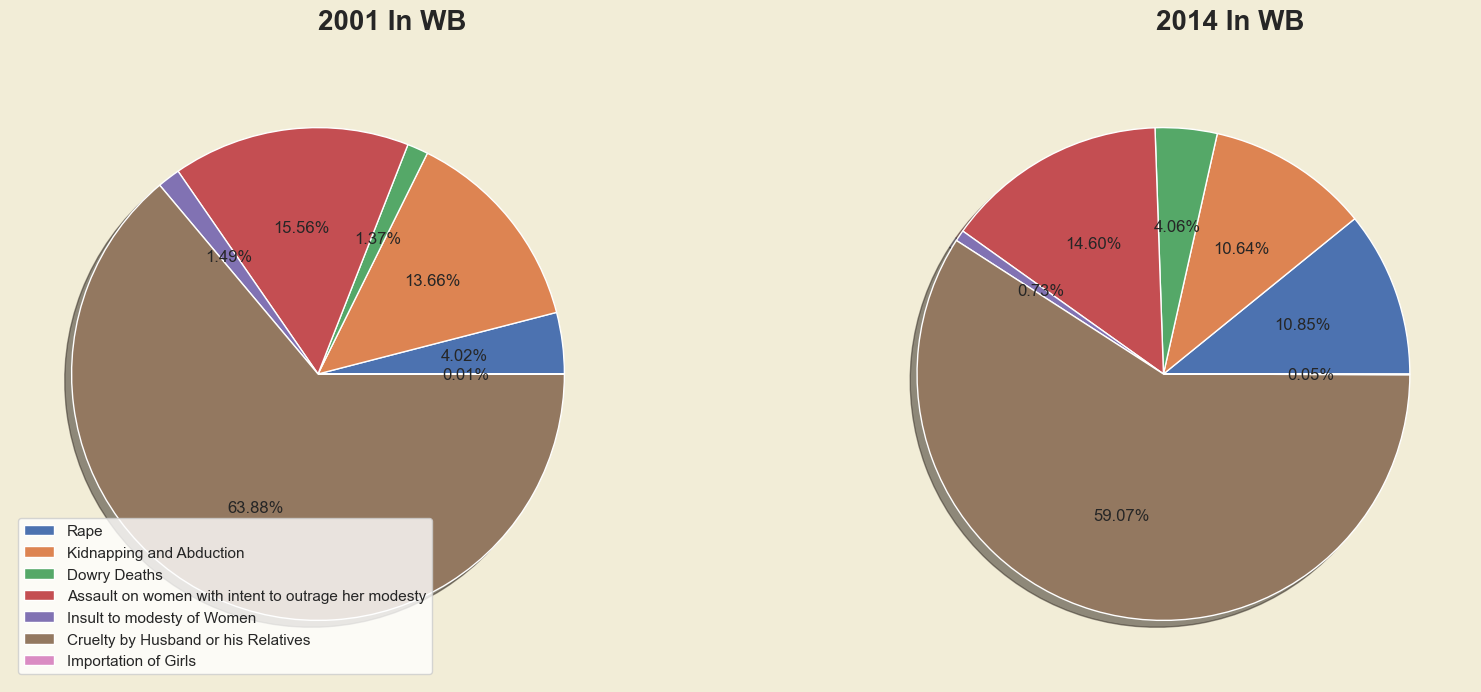

In [52]:
df_2001=df1_wb_yearwise.loc[df1.index==2001]
df_2014=df1_wb_yearwise.loc[df1.index==2014]

df_2001=df_2001.drop(["total_crimes"],axis=1)
df_2014=df_2014.drop(["total_crimes"],axis=1)
crimes_in_2001=list(df_2001.iloc[0])
crimes_in_2014=list(df_2014.iloc[0])

f,ax=plt.subplots(1,2,figsize=(20,8))
f.patch.set_facecolor('#F2EDD7FF')
#Setting background and foreground color
for j in range(0,2):
    ax[j].set_facecolor('#F2EDD7FF')
    
ax[0].pie(crimes_in_2001,autopct='%1.2f%%',shadow=True)
ax[0].text(0,1.4,"2001 In WB",fontweight='bold',fontsize=20)
ax[1].pie(crimes_in_2014,autopct='%1.2f%%',shadow=True)
ax[0].text(3.4,1.4,"2014 In WB",fontweight='bold',fontsize=20)
ax[0].legend(labels=df_2001.columns,loc='best')

plt.show()